In [1]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import json
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns


import torch
import torch.nn.functional as F

from transformers import *

import collections
import os

import nltk
%matplotlib inline

from pandas import Series,DataFrame
import pandas as pd

import json 
import copy


In [2]:
# 处理 DiffVec的数据
filename = 'diffvec_word_pairs_final.SEMBLESS.csv'
file_colname=['relation','word1','word2']
df = pd.read_csv(filename,header=None,names=file_colname)

df

,relation,word1,word2
0,ATTRIBUTE$Action:ObjectAttribute,apple,picker
1,ATTRIBUTE$Action:ObjectAttribute,collect,fee
2,ATTRIBUTE$Action:ObjectAttribute,hunter,game
3,ATTRIBUTE$Action:ObjectAttribute,paint,house
4,ATTRIBUTE$Action:ObjectAttribute,vitamin,deficiency
...,...,...,...
12453,vn-deriv,yawn,yawning
12454,vn-deriv,yearn,yearning
12455,vn-deriv,yell,yelling
12456,vn-deriv,yield,yielding


In [3]:
df = df[df['relation'].str.contains('mero')]
df

,relation,word1,word2
5391,mero,airplane,cockpit
5392,mero,airport,terminal
5393,mero,air,puff
5394,mero,alligator,eye
5395,mero,alligator,foot
...,...,...,...
8211,mero,yacht,wood
8212,mero,yogurt,milk
8213,mero,zebra,stripes
8214,mero,zoo,animal


In [4]:
mero = df.groupby(['word2'])['word1'].apply(list).to_dict()
print(mero)

print(len(mero))

{'accelerator': ['ambulance', 'bus', 'car', 'motorcycle', 'scooter', 'truck', 'van'], 'act': ['play'], 'actor': ['audition'], 'aisle': ['supermarket'], 'alcohol': ['cocktail', 'party', 'pub', 'wine'], 'altar': ['cathedral'], 'ammo': ['cannon', 'gun', 'pistol', 'revolver', 'rifle'], 'ammunition': ['cannon', 'gun', 'pistol', 'revolver', 'rifle'], 'amplifier': ['radio', 'stereo', 'television'], 'anchor': ['battleship', 'ferry', 'frigate', 'tanker', 'yacht'], 'animal': ['zoo'], 'antenna': ['ant', 'beetle', 'butterfly', 'cockroach', 'grasshopper', 'hornet', 'moth', 'phone', 'radio', 'stereo', 'television', 'wasp'], 'antler': ['deer'], 'arch': ['cathedral'], 'archbishop': ['cathedral'], 'arm': ['blouse', 'chair', 'coat', 'couch', 'dress', 'gorilla', 'jacket', 'shirt', 'sofa', 'sweater'], 'athlete': ['competition', 'meet'], 'back': ['ambulance', 'blouse', 'bomber', 'bus', 'car', 'cello', 'chair', 'cloak', 'coat', 'couch', 'dress', 'fighter', 'guitar', 'hat', 'helicopter', 'jacket', 'jet', 'mo

In [8]:
templates = [
    'The _ and the * are part of the whole relationship .',
    'The _ is a part of * .',
]

In [6]:
# 引入模型
models = {}

model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

model, tokenizer, mask_token = models['roberta-large']

loading state_dict took 1.205 sec


Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


loading state_dict took 2.828 sec


Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-large and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The _ and the accelerator are part of the whole relationship .
['pump', 'generator', 'accelerator', 'collector', 'sender', 'driver', 'particle', 'catalyst', 'computer', 'sensor']
tensor([0.0430, 0.0306, 0.0225, 0.0200, 0.0188, 0.0187, 0.0187, 0.0140, 0.0130,
        0.0113])
scooteris not in list
{'ambulance': tensor(4.1034e-06), 'bus': tensor(0.0066), 'car': tensor(0.0023), 'motorcycle': tensor(0.0001), 'truck': tensor(0.0005), 'van': tensor(5.5394e-05)}
max_probe is: tensor(0.0066)
20
40
the position of max probe is: 23
-----------------------------------------------------
*****************************************************
The _ and the act are part of the whole relationship .
['words', 'moment', 'relationship', 'intention', 'thought', 'person', 'gesture', 'word', 'conversation', 'love']
tensor([0.0782, 0.0512, 0.0426, 0.0412, 0.0389, 0.0370, 0.0334, 0.0262, 0.0257,
        0.0248])
{'play': tensor(0.0005)}
max_probe is: tensor(0.0005)
20
40
80
160
320
the position of max probe is

['pope', 'bishop', 'cardinal', 'priest', 'pastor', 'priests', 'Pope', 'church', 'parish', 'president']
tensor([0.3227, 0.2193, 0.1086, 0.0830, 0.0157, 0.0147, 0.0126, 0.0119, 0.0097,
        0.0091])
{'cathedral': tensor(0.0005)}
max_probe is: tensor(0.0005)
20
40
80
the position of max probe is: 71
-----------------------------------------------------
*****************************************************
The _ and the arm are part of the whole relationship .
['hand', 'leg', 'head', 'wrist', 'shoulder', 'foot', 'face', 'neck', 'finger', 'thigh']
tensor([0.4018, 0.0759, 0.0683, 0.0420, 0.0366, 0.0273, 0.0261, 0.0193, 0.0158,
        0.0154])
blouseis not in list
{'chair': tensor(0.0002), 'coat': tensor(0.0003), 'couch': tensor(3.4778e-05), 'dress': tensor(0.0003), 'gorilla': tensor(2.9618e-06), 'jacket': tensor(0.0004), 'shirt': tensor(0.0011), 'sofa': tensor(2.0273e-05), 'sweater': tensor(9.8955e-05)}
max_probe is: tensor(0.0011)
20
40
80
the position of max probe is: 54
--------------

['hair', 'mustache', 'beard', 'haircut', 'hat', 'face', 'eyes', 'head', 'nose', 'man']
tensor([0.3274, 0.1454, 0.0648, 0.0555, 0.0484, 0.0215, 0.0166, 0.0140, 0.0132,
        0.0127])
{'goat': tensor(2.7275e-05)}
max_probe is: tensor(2.7275e-05)
20
40
80
160
320
640
1280
the position of max probe is: 697
-----------------------------------------------------
*****************************************************
The _ and the bed are part of the whole relationship .
['couch', 'sofa', 'bedroom', 'mattress', 'room', 'bath', 'furniture', 'bathroom', 'bed', 'closet']
tensor([0.0857, 0.0636, 0.0629, 0.0484, 0.0466, 0.0418, 0.0377, 0.0340, 0.0337,
        0.0292])
{'bedroom': tensor(0.0629), 'hospital': tensor(9.6055e-05), 'hotel': tensor(0.0011), 'river': tensor(2.5800e-05)}
max_probe is: tensor(0.0629)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ and the bedroom are part of the whole relation

['pillow', 'blanket', 'scarf', 'hat', 'sheets', 'bed', 'chair', 'cat', 'towel', 'sweater']
tensor([0.1630, 0.0525, 0.0361, 0.0273, 0.0265, 0.0260, 0.0259, 0.0229, 0.0225,
        0.0224])
{'bed': tensor(0.0260), 'picnic': tensor(3.1338e-05)}
max_probe is: tensor(0.0260)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
The _ and the block are part of the whole relationship .
['chain', 'frame', 'block', 'cube', 'square', 'triangle', 'line', 'key', 'corner', 'message']
tensor([0.0205, 0.0171, 0.0164, 0.0158, 0.0157, 0.0120, 0.0120, 0.0114, 0.0088,
        0.0087])
{'city': tensor(0.0012)}
max_probe is: tensor(0.0012)
20
40
80
160
the position of max probe is: 153
-----------------------------------------------------
*****************************************************
The _ and the blood are part of the whole relationship .
['flesh', 'skin', 'body', 'bones', 'bone', 'sweat', 'heart', 'tears', 'dirt

['glass', 'bottle', 'cup', 'spoon', 'bag', 'man', 'jar', 'pot', 'water', 'wine']
tensor([0.1293, 0.0485, 0.0298, 0.0276, 0.0145, 0.0144, 0.0142, 0.0122, 0.0119,
        0.0109])
{'pub': tensor(3.3750e-05), 'restaurant': tensor(0.0005)}
max_probe is: tensor(0.0005)
20
40
80
160
320
the position of max probe is: 297
-----------------------------------------------------
*****************************************************
The _ and the bottom are part of the whole relationship .
['top', 'middle', 'head', 'bottom', 'front', 'tops', 'center', 'sides', 'upper', 'roof']
tensor([9.5688e-01, 2.2267e-02, 3.5039e-03, 2.5488e-03, 1.1217e-03, 1.0733e-03,
        8.4587e-04, 6.3371e-04, 5.9774e-04, 4.2406e-04])
cellois not in list
{'bag': tensor(5.3500e-06), 'bottle': tensor(3.3253e-06), 'bowl': tensor(2.2983e-06), 'box': tensor(1.3194e-05), 'guitar': tensor(1.3745e-07), 'jar': tensor(9.8445e-07), 'mug': tensor(4.8533e-07), 'piano': tensor(3.1384e-07), 'violin': tensor(2.2703e-07), 'wardrobe': tens

['oven', 'kettle', 'smoker', 'pot', 'stove', 'chicken', 'grill', 'cooker', 'pan', 'roast']
tensor([0.0954, 0.0861, 0.0472, 0.0409, 0.0345, 0.0257, 0.0227, 0.0199, 0.0198,
        0.0123])
{'oven': tensor(0.0954)}
max_probe is: tensor(0.0954)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ and the bronze are part of the whole relationship .
['marble', 'stone', 'wood', 'painting', 'metal', 'silver', 'glass', 'bronze', 'gold', 'sculpture']
tensor([0.0427, 0.0394, 0.0270, 0.0256, 0.0240, 0.0209, 0.0205, 0.0158, 0.0154,
        0.0153])
{'cannon': tensor(0.0002), 'dagger': tensor(0.0004), 'spear': tensor(0.0003), 'sword': tensor(0.0032)}
max_probe is: tensor(0.0032)
20
40
80
the position of max probe is: 46
-----------------------------------------------------
*****************************************************
The _ and the bulb are part of the whole relationship .
['light', 'bulb', 'lamp', 

['cap', 'hat', 'crown', 'beard', 'hair', 'star', 'ring', 'ball', 'seal', 'mask']
tensor([0.0441, 0.0375, 0.0244, 0.0129, 0.0118, 0.0101, 0.0101, 0.0097, 0.0085,
        0.0084])
{'bottle': tensor(0.0043), 'jar': tensor(0.0005)}
max_probe is: tensor(0.0043)
20
40
the position of max probe is: 35
-----------------------------------------------------
*****************************************************
The _ and the capsule are part of the whole relationship .
['capsule', 'bottle', 'box', 'bag', 'container', 'glass', 'water', 'flower', 'egg', 'coin']
tensor([0.0457, 0.0285, 0.0171, 0.0111, 0.0109, 0.0102, 0.0101, 0.0096, 0.0096,
        0.0084])
{'medicine': tensor(0.0010)}
max_probe is: tensor(0.0010)
20
40
80
160
320
the position of max probe is: 189
-----------------------------------------------------
*****************************************************
The _ and the captain are part of the whole relationship .
['crew', 'captain', 'ship', 'sailor', 'master', 'commander', 'pilot', 'o

['host', 'virus', 'gene', 'nucleus', 'organism', 'body', 'tissue', 'receptor', 'protein', 'cell']
tensor([0.0853, 0.0657, 0.0555, 0.0413, 0.0395, 0.0362, 0.0320, 0.0308, 0.0282,
        0.0268])
{'body': tensor(0.0362)}
max_probe is: tensor(0.0362)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
The _ and the cement are part of the whole relationship .
['water', 'mortar', 'concrete', 'rock', 'brick', 'sand', 'cement', 'stone', 'soil', 'wood']
tensor([0.0884, 0.0877, 0.0433, 0.0429, 0.0407, 0.0380, 0.0364, 0.0279, 0.0236,
        0.0189])
{'concrete': tensor(0.0433)}
max_probe is: tensor(0.0433)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ and the center are part of the whole relationship .
['periphery', 'edges', 'outside', 'center', 'sides', 'edge', 'bottom', 'boundary', 'perimeter', 'circle']
te

['circuit', 'circuits', 'clock', 'signal', 'loop', 'system', 'gate', 'wire', 'device', 'transistor']
tensor([0.1199, 0.0258, 0.0255, 0.0229, 0.0221, 0.0168, 0.0162, 0.0156, 0.0141,
        0.0135])
{'radio': tensor(0.0005), 'stereo': tensor(7.1901e-06), 'television': tensor(1.3737e-05)}
max_probe is: tensor(0.0005)
20
40
80
160
320
the position of max probe is: 267
-----------------------------------------------------
*****************************************************
The _ and the city are part of the whole relationship .
['river', 'country', 'people', 'environment', 'state', 'house', 'farm', 'individual', 'family', 'car']
tensor([0.0516, 0.0386, 0.0349, 0.0308, 0.0293, 0.0280, 0.0274, 0.0261, 0.0256,
        0.0194])
{'country': tensor(0.0386), 'state': tensor(0.0293)}
max_probe is: tensor(0.0386)
the position of max probe is: 1
-----------------------------------------------------
*****************************************************
The _ and the claw are part of the whole relat

['body', 'coffin', 'cross', 'grave', 'corpse', 'shroud', 'heart', 'dress', 'flowers', 'box']
tensor([0.1503, 0.1256, 0.0547, 0.0429, 0.0189, 0.0166, 0.0126, 0.0099, 0.0093,
        0.0090])
{'funeral': tensor(0.0021)}
max_probe is: tensor(0.0021)
20
40
80
the position of max probe is: 61
-----------------------------------------------------
*****************************************************
The _ and the coins are part of the whole relationship .
['stamps', 'coins', 'gold', 'money', 'notes', 'currency', 'rings', 'medals', 'diamonds', 'jewelry']
tensor([0.0756, 0.0615, 0.0573, 0.0362, 0.0320, 0.0187, 0.0133, 0.0125, 0.0110,
        0.0090])
{'dollar': tensor(0.0018)}
max_probe is: tensor(0.0018)
20
40
80
the position of max probe is: 57
-----------------------------------------------------
*****************************************************
The _ and the collar are part of the whole relationship .
['leash', 'collar', 'harness', 'dog', 'chain', 'tag', 'shirt', 'tags', 'rope', 'vest'

['gold', 'iron', 'zinc', 'nickel', 'silver', 'aluminum', 'lead', 'tin', 'copper', 'metal']
tensor([0.1640, 0.1267, 0.0949, 0.0817, 0.0810, 0.0468, 0.0384, 0.0217, 0.0208,
        0.0173])
fluteis not in list
{}
The _ and the cord are part of the whole relationship .
['cord', 'thread', 'rope', 'knot', 'wire', 'body', 'head', 'skin', 'nipple', 'ring']
tensor([0.0725, 0.0332, 0.0294, 0.0279, 0.0213, 0.0207, 0.0176, 0.0144, 0.0112,
        0.0109])
{'phone': tensor(0.0012)}
max_probe is: tensor(0.0012)
20
40
80
160
the position of max probe is: 153
-----------------------------------------------------
*****************************************************
The _ and the core are part of the whole relationship .
['periphery', 'core', 'exterior', 'heart', 'surface', 'foundation', 'soul', 'outside', 'center', 'body']
tensor([0.0410, 0.0378, 0.0329, 0.0327, 0.0317, 0.0287, 0.0222, 0.0162, 0.0134,
        0.0104])
{'apple': tensor(0.0001), 'pear': tensor(4.2038e-05), 'pineapple': tensor(1.0517e-0

['glass', 'bottle', 'spoon', 'bowl', 'plate', 'water', 'cup', 'pot', 'pitcher', 'dish']
tensor([0.0673, 0.0511, 0.0501, 0.0440, 0.0378, 0.0296, 0.0247, 0.0236, 0.0205,
        0.0129])
dishwasheris not in list
{}
The _ and the cushion are part of the whole relationship .
['chair', 'pillow', 'cushion', 'seat', 'mattress', 'bed', 'blanket', 'couch', 'hand', 'mat']
tensor([0.0748, 0.0674, 0.0513, 0.0278, 0.0271, 0.0194, 0.0161, 0.0136, 0.0093,
        0.0085])
{'chair': tensor(0.0748), 'couch': tensor(0.0136), 'sofa': tensor(0.0079)}
max_probe is: tensor(0.0748)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ and the customer are part of the whole relationship .
['supplier', 'retailer', 'dealer', 'product', 'manufacturer', 'seller', 'brand', 'employee', 'agent', 'vendor']
tensor([0.1492, 0.0949, 0.0702, 0.0615, 0.0524, 0.0423, 0.0355, 0.0332, 0.0303,
        0.0289])
{'hotel': tensor(0.0002),

['roof', 'sky', 'sun', 'building', 'house', 'dome', 'earth', 'clouds', 'moon', 'room']
tensor([0.0404, 0.0308, 0.0224, 0.0194, 0.0186, 0.0181, 0.0154, 0.0118, 0.0116,
        0.0106])
{'cathedral': tensor(0.0012)}
max_probe is: tensor(0.0012)
20
40
80
160
the position of max probe is: 133
-----------------------------------------------------
*****************************************************
The _ and the door are part of the whole relationship .
['window', 'wall', 'key', 'bed', 'mirror', 'windows', 'house', 'door', 'lock', 'walls']
tensor([0.1225, 0.0797, 0.0481, 0.0319, 0.0289, 0.0264, 0.0228, 0.0198, 0.0196,
        0.0194])
dishwasheris not in list
villais not in list
washeris not in list
{'ambulance': tensor(5.8950e-06), 'bomber': tensor(1.8680e-06), 'bus': tensor(2.5048e-05), 'car': tensor(0.0025), 'castle': tensor(6.5715e-05), 'cathedral': tensor(1.5863e-05), 'cottage': tensor(5.2533e-05), 'fighter': tensor(7.2200e-06), 'freezer': tensor(0.0002), 'fridge': tensor(0.0039), 'he

['sperm', 'chicken', 'mother', 'chicks', 'chickens', 'birds', 'hen', 'fish', 'bird', 'chick']
tensor([0.3147, 0.1097, 0.0757, 0.0403, 0.0189, 0.0182, 0.0151, 0.0147, 0.0139,
        0.0124])
omeletteis not in list
{}
The _ and the ejector are part of the whole relationship .
['rocket', 'engine', 'booster', 'fuel', 'pilot', 'driver', 'piston', 'nozzle', 'sender', 'gas']
tensor([0.0742, 0.0613, 0.0406, 0.0195, 0.0194, 0.0186, 0.0181, 0.0180, 0.0158,
        0.0153])
{'cannon': tensor(0.0023), 'gun': tensor(0.0028), 'pistol': tensor(0.0003), 'revolver': tensor(2.0693e-05), 'rifle': tensor(0.0005)}
max_probe is: tensor(0.0028)
20
40
80
the position of max probe is: 58
-----------------------------------------------------
*****************************************************
The _ and the electricity are part of the whole relationship .
['water', 'heat', 'gas', 'air', 'light', 'wind', 'temperature', 'battery', 'sun', 'batteries']
tensor([0.4108, 0.0866, 0.0693, 0.0360, 0.0192, 0.0186, 0.015

['fabric', 'thread', 'yarn', 'material', 'garment', 'clothes', 'cloth', 'threads', 'chair', 'color']
tensor([0.1060, 0.0526, 0.0381, 0.0309, 0.0220, 0.0179, 0.0168, 0.0157, 0.0149,
        0.0146])
blouseis not in list
{'coat': tensor(0.0029), 'dress': tensor(0.0059), 'glove': tensor(0.0007), 'jacket': tensor(0.0013), 'scarf': tensor(0.0014), 'shirt': tensor(0.0070), 'sweater': tensor(0.0041), 'vest': tensor(8.0915e-05)}
max_probe is: tensor(0.0070)
20
40
the position of max probe is: 22
-----------------------------------------------------
*****************************************************
The _ and the family are part of the whole relationship .
['children', 'kids', 'child', 'home', 'dog', 'baby', 'partner', 'wife', 'friends', 'marriage']
tensor([0.2393, 0.1352, 0.1332, 0.0612, 0.0261, 0.0260, 0.0235, 0.0228, 0.0227,
        0.0172])
{'funeral': tensor(3.2334e-06)}
max_probe is: tensor(3.2334e-06)
20
40
80
160
320
640
1280
2560
the position of max probe is: 2523
------------------

['spirit', 'soul', 'blood', 'mind', 'heart', 'body', 'brain', 'bones', 'skin', 'bone']
tensor([0.3896, 0.1166, 0.0822, 0.0667, 0.0639, 0.0150, 0.0119, 0.0109, 0.0074,
        0.0071])
{'body': tensor(0.0150), 'deer': tensor(2.0295e-05), 'goat': tensor(0.0002), 'horse': tensor(0.0001), 'pig': tensor(1.1442e-05), 'sheep': tensor(2.2008e-05)}
max_probe is: tensor(0.0150)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
The _ and the floor are part of the whole relationship .
['walls', 'ceiling', 'wall', 'roof', 'bed', 'floor', 'chair', 'stairs', 'furniture', 'table']
tensor([0.3476, 0.1685, 0.1340, 0.0367, 0.0258, 0.0170, 0.0111, 0.0110, 0.0109,
        0.0095])
villais not in list
{'ambulance': tensor(4.1017e-07), 'building': tensor(0.0018), 'bus': tensor(2.8085e-05), 'car': tensor(0.0003), 'castle': tensor(1.5797e-05), 'cathedral': tensor(1.7970e-06), 'cottage': tensor(5.5437e-06), 'hospital': ten

['love', 'heart', 'past', 'man', 'mother', 'bond', 'knot', 'lover', 'friend', 'handshake']
tensor([0.0112, 0.0112, 0.0100, 0.0090, 0.0087, 0.0070, 0.0070, 0.0062, 0.0056,
        0.0052])
{'guitar': tensor(0.0002)}
max_probe is: tensor(0.0002)
20
40
80
160
320
640
1280
the position of max probe is: 878
-----------------------------------------------------
*****************************************************
The _ and the frill are part of the whole relationship .
['dress', 'flower', 'lace', 'ring', 'scarf', 'skirt', 'glitter', 'charm', 'flowers', 'collar']
tensor([0.0398, 0.0298, 0.0207, 0.0186, 0.0172, 0.0164, 0.0160, 0.0134, 0.0131,
        0.0123])
{'dress': tensor(0.0398)}
max_probe is: tensor(0.0398)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ and the fringe are part of the whole relationship .
['center', 'centre', 'core', 'middle', 'mainstream', 'foreground', 'fringe', 'central'

['oil', 'diesel', 'fuel', 'gasoline', 'gas', 'water', 'air', 'engine', 'motor', 'truck']
tensor([0.3076, 0.1409, 0.0707, 0.0473, 0.0220, 0.0210, 0.0203, 0.0173, 0.0157,
        0.0154])
scooteris not in list
{'ambulance': tensor(1.0329e-05), 'bus': tensor(0.0002), 'car': tensor(0.0146), 'motorcycle': tensor(0.0006), 'truck': tensor(0.0154), 'van': tensor(0.0008)}
max_probe is: tensor(0.0154)
the position of max probe is: 9
-----------------------------------------------------
*****************************************************
The _ and the gate are part of the whole relationship .
['gate', 'fence', 'key', 'wall', 'door', 'house', 'horse', 'lock', 'guard', 'slave']
tensor([0.0924, 0.0707, 0.0476, 0.0401, 0.0367, 0.0272, 0.0222, 0.0154, 0.0153,
        0.0104])
villais not in list
{'castle': tensor(0.0044)}
max_probe is: tensor(0.0044)
20
40
the position of max probe is: 26
-----------------------------------------------------
*****************************************************
The 

the position of max probe is: 114
-----------------------------------------------------
*****************************************************
The _ and the hand are part of the whole relationship .
['foot', 'heart', 'eye', 'wrist', 'arm', 'finger', 'head', 'elbow', 'feet', 'mouth']
tensor([0.1873, 0.0907, 0.0776, 0.0679, 0.0566, 0.0436, 0.0420, 0.0315, 0.0299,
        0.0185])
{'gorilla': tensor(8.9521e-07)}
max_probe is: tensor(8.9521e-07)
20
40
80
160
320
640
1280
2560
5120
the position of max probe is: 4941
-----------------------------------------------------
*****************************************************
The _ and the handbrake are part of the whole relationship .
['accelerator', 'brake', 'brakes', 'engine', 'pedal', 'throttle', 'clutch', 'wheel', 'car', 'driver']
tensor([0.1556, 0.1516, 0.1235, 0.0474, 0.0299, 0.0261, 0.0246, 0.0157, 0.0134,
        0.0127])
{'ambulance': tensor(0.0001), 'bus': tensor(0.0007), 'car': tensor(0.0134), 'truck': tensor(0.0014), 'van': tensor(7

['blade', 'hammer', 'sword', 'handle', 'shaft', 'trigger', 'knife', 'barrel', 'grip', 'striker']
tensor([0.1991, 0.1283, 0.0372, 0.0327, 0.0316, 0.0215, 0.0191, 0.0184, 0.0157,
        0.0152])
{'dagger': tensor(0.0047), 'knife': tensor(0.0191), 'sword': tensor(0.0372)}
max_probe is: tensor(0.0372)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ and the holder are part of the whole relationship .
['seller', 'issuer', 'receiver', 'sender', 'buyer', 'borrower', 'bearer', 'user', 'client', 'recipient']
tensor([0.1148, 0.0867, 0.0784, 0.0440, 0.0440, 0.0321, 0.0266, 0.0202, 0.0179,
        0.0168])
{'cannon': tensor(1.2947e-06), 'gun': tensor(7.4237e-05), 'pistol': tensor(1.3181e-05), 'revolver': tensor(2.2851e-05), 'rifle': tensor(1.0558e-05)}
max_probe is: tensor(7.4237e-05)
20
40
80
160
320
640
the position of max probe is: 609
-----------------------------------------------------
*********

['process', 'product', 'recipe', 'preparation', 'ingredient', 'food', 'spice', 'flavor', 'vegetable', 'sauce']
tensor([0.0848, 0.0496, 0.0450, 0.0272, 0.0244, 0.0226, 0.0172, 0.0133, 0.0113,
        0.0112])
{'recipe': tensor(0.0450)}
max_probe is: tensor(0.0450)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ and the inside are part of the whole relationship .
['outside', 'outer', 'exterior', 'outdoors', 'out', 'inside', 'external', 'surface', 'world', 'front']
tensor([9.9172e-01, 2.1451e-03, 1.9279e-03, 3.9532e-04, 3.9120e-04, 2.2709e-04,
        2.1707e-04, 1.6417e-04, 1.6355e-04, 1.3898e-04])
bookcaseis not in list
dishwasheris not in list
toasteris not in list
villais not in list
washeris not in list
{'ambulance': tensor(3.8016e-09), 'bag': tensor(1.0505e-07), 'bottle': tensor(3.5827e-07), 'bowl': tensor(7.2494e-09), 'box': tensor(3.5139e-06), 'bus': tensor(3.4065e-08), 'car': tensor(

320
the position of max probe is: 188
-----------------------------------------------------
*****************************************************
The _ and the kernel are part of the whole relationship .
['kernel', 'core', 'stack', 'driver', 'seed', 'root', 'processor', 'user', 'compiler', 'host']
tensor([0.2239, 0.0384, 0.0201, 0.0190, 0.0180, 0.0134, 0.0128, 0.0110, 0.0100,
        0.0087])
{'corn': tensor(4.2268e-06)}
max_probe is: tensor(4.2268e-06)
20
40
80
160
320
640
1280
2560
5120
the position of max probe is: 4857
-----------------------------------------------------
*****************************************************
The _ and the key are part of the whole relationship .
['lock', 'key', 'ring', 'code', 'person', 'door', 'book', 'coin', 'heart', 'skeleton']
tensor([0.2961, 0.1203, 0.0296, 0.0166, 0.0131, 0.0130, 0.0114, 0.0082, 0.0067,
        0.0065])
clarinetis not in list
fluteis not in list
saxophoneis not in list
{'bag': tensor(0.0026), 'box': tensor(0.0036), 'piano': t

['leather', 'wood', 'fur', 'metal', 'wool', 'stitching', 'fabric', 'skin', 'silk', 'bone']
tensor([0.1160, 0.0592, 0.0488, 0.0458, 0.0243, 0.0222, 0.0196, 0.0182, 0.0157,
        0.0153])
{'bag': tensor(0.0007), 'boots': tensor(0.0046), 'couch': tensor(7.0723e-05), 'glove': tensor(0.0008), 'hat': tensor(0.0005), 'jacket': tensor(0.0005), 'sofa': tensor(4.2891e-05)}
max_probe is: tensor(0.0046)
20
40
the position of max probe is: 28
-----------------------------------------------------
*****************************************************
The _ and the leg are part of the whole relationship .
['foot', 'arm', 'hand', 'ankle', 'hip', 'shoe', 'knee', 'thigh', 'head', 'leg']
tensor([0.3487, 0.1747, 0.0648, 0.0432, 0.0221, 0.0212, 0.0209, 0.0187, 0.0175,
        0.0141])
alligatoris not in list
beaveris not in list
cockroachis not in list
dresseris not in list
grasshopperis not in list
hornetis not in list
waspis not in list
{'ant': tensor(0.0003), 'bear': tensor(0.0001), 'beetle': tensor(5.

['nucleus', 'brain', 'heart', 'cortex', 'ear', 'membrane', 'head', 'root', 'center', 'ears']
tensor([0.0952, 0.0498, 0.0321, 0.0288, 0.0212, 0.0196, 0.0193, 0.0178, 0.0154,
        0.0154])
{'ear': tensor(0.0212)}
max_probe is: tensor(0.0212)
the position of max probe is: 4
-----------------------------------------------------
*****************************************************
The _ and the lock are part of the whole relationship .
['key', 'keys', 'bolt', 'door', 'chain', 'lock', 'combination', 'ring', 'gate', 'hammer']
tensor([9.3076e-01, 1.7095e-02, 7.3747e-03, 6.4320e-03, 3.7103e-03, 3.4869e-03,
        1.7317e-03, 1.3458e-03, 1.2768e-03, 7.1856e-04])
{'box': tensor(5.3638e-05), 'gun': tensor(0.0001), 'pistol': tensor(1.4347e-05), 'revolver': tensor(8.7506e-06), 'rifle': tensor(5.5064e-06)}
max_probe is: tensor(0.0001)
20
40
80
the position of max probe is: 43
-----------------------------------------------------
*****************************************************
The _ and the

['pregnancy', 'child', 'birth', 'baby', 'father', 'conception', 'infant', 'fetus', 'newborn', 'mother']
tensor([0.1275, 0.1155, 0.1061, 0.0588, 0.0581, 0.0495, 0.0352, 0.0320, 0.0308,
        0.0291])
{'hospital': tensor(0.0008)}
max_probe is: tensor(0.0008)
20
40
80
160
the position of max probe is: 84
-----------------------------------------------------
*****************************************************
The _ and the mattress are part of the whole relationship .
['bed', 'mattress', 'pillow', 'sheets', 'couch', 'chair', 'floor', 'sheet', 'sofa', 'furniture']
tensor([0.2574, 0.0956, 0.0844, 0.0765, 0.0327, 0.0257, 0.0199, 0.0182, 0.0178,
        0.0152])
{'bed': tensor(0.2574)}
max_probe is: tensor(0.2574)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ and the meal are part of the whole relationship .
['wine', 'preparation', 'conversation', 'food', 'drink', 'bed', 'meal', 'table', 'dr

['house', 'sex', 'drugs', 'car', 'relationship', 'food', 'job', 'woman', 'work', 'women']
tensor([0.1446, 0.0760, 0.0497, 0.0369, 0.0342, 0.0265, 0.0170, 0.0169, 0.0140,
        0.0136])
{'bank': tensor(0.0017)}
max_probe is: tensor(0.0017)
20
40
80
the position of max probe is: 61
-----------------------------------------------------
*****************************************************
The _ and the monitor are part of the whole relationship .
['user', 'computer', 'server', 'listener', 'patient', 'client', 'system', 'controller', 'receiver', 'host']
tensor([0.1028, 0.0377, 0.0340, 0.0259, 0.0251, 0.0231, 0.0188, 0.0165, 0.0158,
        0.0134])
{'television': tensor(0.0003)}
max_probe is: tensor(0.0003)
20
40
80
160
320
640
the position of max probe is: 340
-----------------------------------------------------
*****************************************************
The _ and the motor are part of the whole relationship .
['brain', 'engine', 'battery', 'motor', 'pump', 'transmission', '

['waist', 'sleeves', 'shoulders', 'skirt', 'collar', 'bust', 'silhouette', 'shoulder', 'dress', 'straps']
tensor([0.1228, 0.1054, 0.0875, 0.0378, 0.0321, 0.0237, 0.0230, 0.0218, 0.0215,
        0.0190])
{'dress': tensor(0.0215)}
max_probe is: tensor(0.0215)
the position of max probe is: 8
-----------------------------------------------------
*****************************************************
The _ and the needle are part of the whole relationship .
['thread', 'needle', 'gun', 'hammer', 'pen', 'string', 'arrow', 'cross', 'knife', 'rod']
tensor([0.2745, 0.0538, 0.0144, 0.0117, 0.0110, 0.0101, 0.0095, 0.0082, 0.0081,
        0.0076])
cedaris not in list
cypressis not in list
{'pine': tensor(8.3977e-05)}
max_probe is: tensor(8.3977e-05)
20
40
80
160
320
640
1280
the position of max probe is: 953
-----------------------------------------------------
*****************************************************
The _ and the net are part of the whole relationship .
['fish', 'net', 'hook', 'anchor

['book', 'books', 'letters', 'words', 'pages', 'text', 'paper', 'story', 'stories', 'writing']
tensor([0.0778, 0.0535, 0.0328, 0.0327, 0.0267, 0.0231, 0.0211, 0.0179, 0.0160,
        0.0134])
{'book': tensor(0.0778)}
max_probe is: tensor(0.0778)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ and the pan are part of the whole relationship .
['pot', 'knife', 'stove', 'candle', 'kettle', 'glass', 'fire', 'egg', 'plate', 'oven']
tensor([0.1348, 0.0963, 0.0351, 0.0295, 0.0257, 0.0227, 0.0190, 0.0188, 0.0180,
        0.0137])
dishwasheris not in list
{}
The _ and the pant are part of the whole relationship .
['shirt', 'man', 'bra', 'pants', 'skirt', 'top', 'dress', 'woman', 'trousers', 'shoe']
tensor([0.0647, 0.0628, 0.0614, 0.0592, 0.0328, 0.0316, 0.0253, 0.0249, 0.0203,
        0.0158])
{'wardrobe': tensor(0.0002)}
max_probe is: tensor(0.0002)
20
40
80
160
320
the position of max probe is: 30

['coins', 'dollar', 'penny', 'dollars', 'stamps', 'nickel', 'money', 'coin', 'notes', 'bills']
tensor([0.1018, 0.0765, 0.0383, 0.0269, 0.0237, 0.0224, 0.0191, 0.0153, 0.0146,
        0.0126])
{'quarter': tensor(0.0051)}
max_probe is: tensor(0.0051)
20
40
the position of max probe is: 25
-----------------------------------------------------
*****************************************************
The _ and the person are part of the whole relationship .
['relationship', 'place', 'object', 'animal', 'person', 'car', 'dog', 'money', 'environment', 'house']
tensor([0.1338, 0.0499, 0.0467, 0.0342, 0.0331, 0.0245, 0.0227, 0.0197, 0.0181,
        0.0178])
{'cathedral': tensor(9.4759e-07), 'hospital': tensor(9.3214e-05), 'hotel': tensor(0.0002), 'library': tensor(5.3669e-05), 'pub': tensor(7.7058e-06), 'restaurant': tensor(0.0004)}
max_probe is: tensor(0.0004)
20
40
80
160
320
the position of max probe is: 239
-----------------------------------------------------
*********************************

['bowl', 'plate', 'glass', 'pot', 'cup', 'spoon', 'dish', 'fork', 'container', 'pitcher']
tensor([0.0833, 0.0707, 0.0563, 0.0451, 0.0292, 0.0227, 0.0201, 0.0188, 0.0103,
        0.0095])
dishwasheris not in list
dresseris not in list
scooteris not in list
{'ambulance': tensor(1.3897e-06), 'bus': tensor(0.0001), 'car': tensor(0.0009), 'motorcycle': tensor(5.2892e-05), 'truck': tensor(0.0003), 'van': tensor(3.0071e-05)}
max_probe is: tensor(0.0009)
20
40
80
160
320
the position of max probe is: 164
-----------------------------------------------------
*****************************************************
The _ and the player are part of the whole relationship .
['game', 'coach', 'team', 'computer', 'spectator', 'referee', 'controller', 'player', 'manager', 'system']
tensor([0.1673, 0.1133, 0.0395, 0.0347, 0.0341, 0.0286, 0.0249, 0.0229, 0.0216,
        0.0214])
{'stereo': tensor(9.9187e-06)}
max_probe is: tensor(9.9187e-06)
20
40
80
160
320
640
1280
2560
the position of max probe is: 226

['sodium', 'calcium', 'magnesium', 'phosphorus', 'nitrogen', 'potassium', 'chloride', 'iron', 'oxygen', 'lithium']
tensor([0.5729, 0.2141, 0.0467, 0.0289, 0.0178, 0.0139, 0.0098, 0.0083, 0.0075,
        0.0066])
{'banana': tensor(4.0209e-07)}
max_probe is: tensor(4.0209e-07)
20
40
80
160
320
640
1280
2560
the position of max probe is: 2470
-----------------------------------------------------
*****************************************************
The _ and the pottery are part of the whole relationship .
['painting', 'food', 'sculpture', 'wine', 'wood', 'garden', 'water', 'paintings', 'pot', 'flowers']
tensor([0.0258, 0.0242, 0.0205, 0.0191, 0.0158, 0.0153, 0.0139, 0.0131, 0.0130,
        0.0129])
{'bowl': tensor(0.0015), 'jar': tensor(0.0012), 'mug': tensor(0.0001)}
max_probe is: tensor(0.0015)
20
40
80
160
the position of max probe is: 114
-----------------------------------------------------
*****************************************************
The _ and the pouch are part of the who

max_probe is: tensor(0.0009)
20
40
80
160
320
the position of max probe is: 195
-----------------------------------------------------
*****************************************************
The _ and the radiator are part of the whole relationship .
['fan', 'heater', 'radiator', 'furnace', 'exhaust', 'pump', 'boiler', 'battery', 'tank', 'water']
tensor([0.1815, 0.1177, 0.0644, 0.0425, 0.0271, 0.0195, 0.0166, 0.0158, 0.0154,
        0.0133])
{'ambulance': tensor(2.7492e-06), 'bus': tensor(0.0002), 'car': tensor(0.0010), 'truck': tensor(0.0003), 'van': tensor(0.0002)}
max_probe is: tensor(0.0010)
20
40
80
160
the position of max probe is: 96
-----------------------------------------------------
*****************************************************
The _ and the radio are part of the whole relationship .
['TV', 'television', 'phone', 'telephone', 'computer', 'clock', 'radio', 'car', 'microphone', 'music']
tensor([0.1780, 0.1560, 0.0716, 0.0542, 0.0346, 0.0221, 0.0172, 0.0143, 0.0141,
      

['bedroom', 'kitchen', 'bed', 'bathroom', 'shower', 'toilet', 'sink', 'bath', 'house', 'closet']
tensor([0.2409, 0.1697, 0.1195, 0.0467, 0.0455, 0.0263, 0.0203, 0.0193, 0.0161,
        0.0159])
{'pub': tensor(0.0001), 'restaurant': tensor(0.0043)}
max_probe is: tensor(0.0043)
20
the position of max probe is: 19
-----------------------------------------------------
*****************************************************
The _ and the reverence are part of the whole relationship .
['love', 'respect', 'fear', 'reverence', 'faith', 'affection', 'worship', 'trust', 'awe', 'devotion']
tensor([0.1857, 0.1026, 0.0341, 0.0243, 0.0182, 0.0158, 0.0152, 0.0149, 0.0126,
        0.0118])
{'prayer': tensor(0.0046)}
max_probe is: tensor(0.0046)
20
40
the position of max probe is: 25
-----------------------------------------------------
*****************************************************
The _ and the ribbon are part of the whole relationship .
['flower', 'heart', 'ribbon', 'flowers', 'necklace', 'ring

['tail', 'head', 'back', 'front', 'spine', 'belly', 'rear', 'trunk', 'waist', 'hips']
tensor([0.1279, 0.0841, 0.0498, 0.0487, 0.0366, 0.0317, 0.0267, 0.0251, 0.0244,
        0.0228])
falconis not in list
penguinis not in list
pheasantis not in list
robinis not in list
swanis not in list
vultureis not in list
{'crow': tensor(1.6493e-05), 'dove': tensor(1.3717e-06), 'eagle': tensor(8.4361e-06), 'goose': tensor(5.8910e-06), 'hawk': tensor(2.2094e-06), 'owl': tensor(2.3160e-06), 'pigeon': tensor(7.3615e-06)}
max_probe is: tensor(1.6493e-05)
20
40
80
160
320
640
1280
the position of max probe is: 985
-----------------------------------------------------
*****************************************************
The _ and the saddle are part of the whole relationship .
['horse', 'saddle', 'rider', 'blanket', 'boots', 'horses', 'cow', 'reins', 'mount', 'harness']
tensor([0.4716, 0.1349, 0.0404, 0.0266, 0.0119, 0.0113, 0.0085, 0.0080, 0.0076,
        0.0070])
{'donkey': tensor(0.0029), 'horse': ten

['chapter', 'section', 'article', 'paragraph', 'title', 'post', 'text', 'body', 'link', 'story']
tensor([0.0481, 0.0425, 0.0399, 0.0347, 0.0203, 0.0198, 0.0130, 0.0125, 0.0111,
        0.0100])
grapefruitis not in list
{}
The _ and the seed are part of the whole relationship .
['plant', 'flower', 'soil', 'seed', 'host', 'parent', 'fruit', 'water', 'tree', 'mother']
tensor([0.1672, 0.1389, 0.0383, 0.0369, 0.0277, 0.0238, 0.0237, 0.0205, 0.0202,
        0.0177])
cucumberis not in list
grapefruitis not in list
{'apple': tensor(0.0008), 'grape': tensor(0.0003), 'lemon': tensor(0.0002), 'lime': tensor(0.0002), 'pear': tensor(5.9014e-05), 'strawberry': tensor(9.6825e-05)}
max_probe is: tensor(0.0008)
20
40
80
160
the position of max probe is: 112
-----------------------------------------------------
*****************************************************
The _ and the shade are part of the whole relationship .
['light', 'sun', 'brightness', 'color', 'sunlight', 'heat', 'shadow', 'colour', 'war

['silicone', 'plastic', 'rubber', 'latex', 'wax', 'oil', 'water', 'skin', 'metal', 'resin']
tensor([0.1771, 0.0652, 0.0540, 0.0386, 0.0287, 0.0262, 0.0237, 0.0222, 0.0211,
        0.0145])
{'glass': tensor(0.0077)}
max_probe is: tensor(0.0077)
20
the position of max probe is: 15
-----------------------------------------------------
*****************************************************
The _ and the silk are part of the whole relationship .
['silk', 'thread', 'wool', 'cotton', 'fabric', 'yarn', 'threads', 'cloth', 'needle', 'wood']
tensor([0.1187, 0.0959, 0.0762, 0.0247, 0.0215, 0.0205, 0.0153, 0.0140, 0.0133,
        0.0130])
blouseis not in list
{'cloak': tensor(0.0002), 'corn': tensor(0.0005), 'dress': tensor(0.0012), 'scarf': tensor(0.0015), 'shirt': tensor(0.0011), 'vest': tensor(4.3646e-05)}
max_probe is: tensor(0.0015)
20
40
80
160
the position of max probe is: 85
-----------------------------------------------------
*****************************************************
The _ and

['soap', 'man', 'relationship', 'food', 'sex', 'clothes', 'woman', 'money', 'phone', 'actor']
tensor([0.0585, 0.0292, 0.0164, 0.0154, 0.0123, 0.0122, 0.0105, 0.0100, 0.0098,
        0.0085])
dishwasheris not in list
washeris not in list
{}
The _ and the soda are part of the whole relationship .
['beer', 'water', 'coffee', 'milk', 'juice', 'wine', 'bread', 'pizza', 'fruit', 'cake']
tensor([0.0588, 0.0399, 0.0379, 0.0306, 0.0194, 0.0180, 0.0151, 0.0150, 0.0147,
        0.0144])
{'bottle': tensor(0.0064)}
max_probe is: tensor(0.0064)
20
40
the position of max probe is: 25
-----------------------------------------------------
*****************************************************
The _ and the sole are part of the whole relationship .
['whole', 'body', 'root', 'joint', 'centre', 'head', 'heart', 'partner', 'sole', 'key']
tensor([0.0491, 0.0306, 0.0281, 0.0154, 0.0139, 0.0132, 0.0130, 0.0127, 0.0118,
        0.0111])
{'shoe': tensor(0.0002)}
max_probe is: tensor(0.0002)
20
40
80
160
320
640


['mast', 'anchor', 'star', 'port', 'horizon', 'prow', 'bow', 'sail', 'moon', 'beam']
tensor([0.0933, 0.0916, 0.0698, 0.0419, 0.0297, 0.0290, 0.0278, 0.0257, 0.0215,
        0.0192])
battleshipis not in list
frigateis not in list
{'tanker': tensor(6.1244e-05)}
max_probe is: tensor(6.1244e-05)
20
40
80
160
320
640
1280
the position of max probe is: 694
-----------------------------------------------------
*****************************************************
The _ and the starch are part of the whole relationship .
['starch', 'protein', 'sugar', 'water', 'yeast', 'salt', 'gluten', 'fat', 'glucose', 'fiber']
tensor([0.1230, 0.1170, 0.1135, 0.1066, 0.0427, 0.0357, 0.0325, 0.0280, 0.0264,
        0.0247])
{'potato': tensor(0.0021)}
max_probe is: tensor(0.0021)
20
40
80
the position of max probe is: 42
-----------------------------------------------------
*****************************************************
The _ and the steam are part of the whole relationship .
['heat', 'smoke', 'fire', '

['string', 'arrow', 'loop', 'key', 'ball', 'body', 'letter', 'atom', 'particle', 'needle']
tensor([0.0416, 0.0307, 0.0242, 0.0145, 0.0138, 0.0138, 0.0132, 0.0124, 0.0102,
        0.0102])
cellois not in list
{'guitar': tensor(0.0003), 'piano': tensor(0.0010), 'violin': tensor(0.0010)}
max_probe is: tensor(0.0010)
20
40
80
160
320
the position of max probe is: 170
-----------------------------------------------------
*****************************************************
The _ and the stripe are part of the whole relationship .
['stripe', 'line', 'circle', 'star', 'stripes', 'color', 'dot', 'cross', 'ribbon', 'logo']
tensor([0.0929, 0.0560, 0.0488, 0.0409, 0.0216, 0.0191, 0.0147, 0.0126, 0.0101,
        0.0096])
{'lizard': tensor(8.9086e-05), 'tiger': tensor(0.0011)}
max_probe is: tensor(0.0011)
20
40
80
160
the position of max probe is: 128
-----------------------------------------------------
*****************************************************
The _ and the stripes are part of the wh

['head', 'tip', 'body', 'nose', 'wings', 'ears', 'tail', 'fins', 'hook', 'legs']
tensor([0.7788, 0.0160, 0.0101, 0.0097, 0.0057, 0.0056, 0.0055, 0.0052, 0.0047,
        0.0045])
alligatoris not in list
beaveris not in list
blouseis not in list
catfishis not in list
goldfishis not in list
herringis not in list
mackerelis not in list
{'bomber': tensor(4.0523e-08), 'bull': tensor(5.2700e-05), 'carp': tensor(1.1443e-05), 'cat': tensor(0.0006), 'coat': tensor(0.0007), 'cod': tensor(2.4842e-05), 'deer': tensor(5.6681e-05), 'dog': tensor(0.0005), 'dolphin': tensor(4.3164e-05), 'donkey': tensor(6.1497e-05), 'elephant': tensor(4.5708e-05), 'fighter': tensor(2.2010e-06), 'fox': tensor(0.0001), 'goat': tensor(1.5436e-05), 'helicopter': tensor(6.4268e-06), 'horse': tensor(0.0002), 'jacket': tensor(5.6563e-05), 'jet': tensor(4.1610e-06), 'lion': tensor(0.0003), 'lizard': tensor(3.1569e-05), 'rabbit': tensor(0.0001), 'rat': tensor(0.0003), 'salmon': tensor(3.7240e-05), 'shirt': tensor(0.0002), 'snak

['bone', 'tooth', 'tongue', 'eye', 'skin', 'nail', 'hair', 'mouth', 'gum', 'apple']
tensor([0.0714, 0.0678, 0.0402, 0.0398, 0.0384, 0.0317, 0.0233, 0.0178, 0.0163,
        0.0135])
alligatoris not in list
beaveris not in list
{'bear': tensor(7.8119e-05), 'cat': tensor(0.0004), 'dolphin': tensor(0.0003), 'elephant': tensor(0.0015), 'fork': tensor(0.0008), 'fox': tensor(0.0001), 'gorilla': tensor(2.8241e-05), 'knife': tensor(0.0017), 'lion': tensor(0.0003), 'rabbit': tensor(0.0003), 'rake': tensor(3.6450e-05), 'rat': tensor(0.0004), 'saw': tensor(6.2026e-05), 'snake': tensor(0.0039), 'squirrel': tensor(8.2667e-05), 'tiger': tensor(6.4726e-05), 'whale': tensor(0.0003)}
max_probe is: tensor(0.0039)
20
40
80
the position of max probe is: 41
-----------------------------------------------------
*****************************************************
The _ and the top are part of the whole relationship .
['bottom', 'middle', 'base', 'sides', 'center', 'top', 'ground', 'back', 'left', 'side']
te

['tank', 'gun', 'ship', 'turret', 'engine', 'soldier', 'helicopter', 'rifle', 'pilot', 'missile']
tensor([0.0671, 0.0396, 0.0310, 0.0280, 0.0171, 0.0155, 0.0137, 0.0127, 0.0122,
        0.0119])
battleshipis not in list
frigateis not in list
{'castle': tensor(0.0013)}
max_probe is: tensor(0.0013)
20
40
80
160
the position of max probe is: 115
-----------------------------------------------------
*****************************************************
The _ and the tusk are part of the whole relationship .
['tooth', 'eye', 'skull', 'skin', 'head', 'tail', 'bone', 'tip', 'tree', 'shell']
tensor([0.0592, 0.0306, 0.0280, 0.0252, 0.0226, 0.0193, 0.0161, 0.0155, 0.0153,
        0.0151])
{'elephant': tensor(0.0033)}
max_probe is: tensor(0.0033)
20
40
80
the position of max probe is: 64
-----------------------------------------------------
*****************************************************
The _ and the underwear are part of the whole relationship .
['bra', 'socks', 'skirt', 'shoes', 'shirt',

['waiter', 'bartender', 'server', 'cook', 'waitress', 'chef', 'driver', 'customer', 'table', 'host']
tensor([0.5188, 0.1280, 0.0432, 0.0341, 0.0341, 0.0302, 0.0237, 0.0145, 0.0121,
        0.0089])
{'pub': tensor(0.0003), 'restaurant': tensor(0.0051)}
max_probe is: tensor(0.0051)
20
the position of max probe is: 13
-----------------------------------------------------
*****************************************************
The _ and the wall are part of the whole relationship .
['door', 'floor', 'house', 'roof', 'window', 'mirror', 'fence', 'ceiling', 'wall', 'building']
tensor([0.1618, 0.0427, 0.0400, 0.0281, 0.0250, 0.0212, 0.0207, 0.0196, 0.0151,
        0.0138])
{'building': tensor(0.0138), 'castle': tensor(0.0009), 'cathedral': tensor(7.4562e-05)}
max_probe is: tensor(0.0138)
the position of max probe is: 9
-----------------------------------------------------
*****************************************************
The _ and the wallet are part of the whole relationship .
['phone', 'p

['food', 'cheese', 'bread', 'beer', 'flowers', 'grapes', 'wine', 'bottle', 'fruit', 'water']
tensor([0.3129, 0.0974, 0.0630, 0.0229, 0.0196, 0.0195, 0.0195, 0.0112, 0.0103,
        0.0087])
{'bottle': tensor(0.0112)}
max_probe is: tensor(0.0112)
the position of max probe is: 7
-----------------------------------------------------
*****************************************************
The _ and the wing are part of the whole relationship .
['head', 'eye', 'body', 'wing', 'tail', 'hand', 'egg', 'fly', 'feather', 'bird']
tensor([0.1079, 0.1055, 0.0700, 0.0538, 0.0325, 0.0277, 0.0239, 0.0157, 0.0135,
        0.0132])
cockroachis not in list
falconis not in list
grasshopperis not in list
hornetis not in list
penguinis not in list
pheasantis not in list
robinis not in list
swanis not in list
vultureis not in list
waspis not in list
{'beetle': tensor(0.0004), 'bomber': tensor(9.0166e-06), 'butterfly': tensor(0.0074), 'crow': tensor(0.0004), 'dove': tensor(0.0007), 'eagle': tensor(0.0002), 'fig

['ethanol', 'taste', 'alcohol', 'caffeine', 'yeast', 'fat', 'sugar', 'THC', 'acid', 'is']
tensor([0.1112, 0.0534, 0.0445, 0.0348, 0.0176, 0.0156, 0.0155, 0.0134, 0.0131,
        0.0129])
{'cocktail': tensor(0.0001), 'party': tensor(5.4664e-06), 'pub': tensor(2.3354e-06), 'wine': tensor(0.0026)}
max_probe is: tensor(0.0026)
20
40
80
the position of max probe is: 53
-----------------------------------------------------
*****************************************************
The _ is a part of altar .
['altar', 'statue', 'cross', 'painting', 'picture', 'following', 'image', 'shrine', 'floor', 'photo']
tensor([0.0304, 0.0300, 0.0247, 0.0176, 0.0145, 0.0116, 0.0114, 0.0111, 0.0098,
        0.0098])
{'cathedral': tensor(0.0007)}
max_probe is: tensor(0.0007)
20
40
80
160
320
the position of max probe is: 256
-----------------------------------------------------
*****************************************************
The _ is a part of ammo .
['bullet', 'shell', 'gun', 'arrow', 'primer', 'above', 

['ball', 'pitch', 'bat', 'ground', 'body', 'stick', 'shaft', 'circle', 'blade', 'point']
tensor([0.1661, 0.0219, 0.0196, 0.0128, 0.0083, 0.0071, 0.0069, 0.0065, 0.0059,
        0.0059])
{'cannon': tensor(9.6661e-05)}
max_probe is: tensor(9.6661e-05)
20
40
80
160
320
640
1280
the position of max probe is: 1180
-----------------------------------------------------
*****************************************************
The _ is a part of bar .
['bar', 'restaurant', 'venue', 'club', 'building', 'cafe', 'kitchen', 'hotel', 'room', 'location']
tensor([0.1983, 0.1257, 0.0343, 0.0292, 0.0215, 0.0186, 0.0161, 0.0159, 0.0110,
        0.0109])
{'hotel': tensor(0.0159), 'pub': tensor(0.0093), 'restaurant': tensor(0.1257), 'wardrobe': tensor(1.4179e-05)}
max_probe is: tensor(0.1257)
the position of max probe is: 1
-----------------------------------------------------
*****************************************************
The _ is a part of barb .
['dagger', 'symbol', 'letter', 'star', 'arrow', 'suffi

['devil', 'Church', 'church', 'world', 'truth', 'Devil', 'soul', 'Lord', 'believer', 'faith']
tensor([0.0919, 0.0396, 0.0328, 0.0324, 0.0244, 0.0235, 0.0176, 0.0167, 0.0147,
        0.0126])
{'church': tensor(0.0328)}
max_probe is: tensor(0.0328)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ is a part of bell .
['bell', 'ring', 'sound', 'speaker', 'key', 'voice', 'volume', 'horn', 'tone', 'instrument']
tensor([0.2749, 0.0217, 0.0097, 0.0091, 0.0071, 0.0065, 0.0062, 0.0058, 0.0055,
        0.0052])
clarinetis not in list
{'cathedral': tensor(4.2012e-05)}
max_probe is: tensor(4.2012e-05)
20
40
80
160
320
640
1280
2560
the position of max probe is: 1839
-----------------------------------------------------
*****************************************************
The _ is a part of belt .
['belt', 'ring', 'following', 'buckle', 'badge', 'ribbon', 'shirt', 'helmet', 'sword', 'flag']
tensor([0.17

['nut', 'hole', 'bolt', 'screw', 'pin', 'ring', 'shaft', 'rest', 'bottom', 'center']
tensor([0.0592, 0.0482, 0.0311, 0.0245, 0.0193, 0.0160, 0.0156, 0.0137, 0.0136,
        0.0122])
{'cannon': tensor(0.0001), 'gun': tensor(0.0012), 'pistol': tensor(0.0002), 'revolver': tensor(5.3138e-05), 'rifle': tensor(0.0001)}
max_probe is: tensor(0.0012)
20
40
80
160
the position of max probe is: 139
-----------------------------------------------------
*****************************************************
The _ is a part of bomb .
['bomb', 'device', 'missile', 'target', 'rocket', 'grenade', 'weapon', 'drone', 'car', 'gun']
tensor([0.1518, 0.0260, 0.0255, 0.0121, 0.0116, 0.0107, 0.0084, 0.0084, 0.0076,
        0.0075])
{'bomber': tensor(0.0063), 'fighter': tensor(0.0001)}
max_probe is: tensor(0.0063)
20
the position of max probe is: 10
-----------------------------------------------------
*****************************************************
The _ is a part of bone .
['marrow', 'tendon', 'skin', 's

['ring', 'metal', 'bell', 'ball', 'nickel', 'letter', 'logo', 'diamond', 'base', 'glass']
tensor([0.0317, 0.0133, 0.0125, 0.0124, 0.0090, 0.0086, 0.0081, 0.0081, 0.0065,
        0.0064])
saxophoneis not in list
{'trumpet': tensor(0.0004)}
max_probe is: tensor(0.0004)
20
40
80
160
320
640
the position of max probe is: 449
-----------------------------------------------------
*****************************************************
The _ is a part of bread .
['dough', 'yeast', 'crust', 'cheese', 'egg', 'butter', 'filling', 'loaf', 'flour', 'bread']
tensor([0.1402, 0.1121, 0.1032, 0.0795, 0.0486, 0.0319, 0.0292, 0.0185, 0.0146,
        0.0145])
toasteris not in list
{}
The _ is a part of breast .
['nipple', 'abdomen', 'stomach', 'neck', 'liver', 'belly', 'vagina', 'head', 'tail', 'breast']
tensor([0.3767, 0.0625, 0.0622, 0.0462, 0.0252, 0.0207, 0.0197, 0.0156, 0.0142,
        0.0140])
pheasantis not in list
robinis not in list
{}
The _ is a part of breech .
['following', 'above', 'right', 'h

['anus', 'penis', 'vagina', 'tail', 'skin', 'head', 'stomach', 'butt', 'hair', 'nipple']
tensor([0.0837, 0.0528, 0.0396, 0.0317, 0.0238, 0.0190, 0.0177, 0.0159, 0.0156,
        0.0150])
{'cannon': tensor(1.1681e-05), 'gun': tensor(7.6680e-05), 'pistol': tensor(2.2972e-05), 'revolver': tensor(9.8912e-06), 'rifle': tensor(6.0322e-06)}
max_probe is: tensor(7.6680e-05)
20
40
80
160
320
640
1280
the position of max probe is: 812
-----------------------------------------------------
*****************************************************
The _ is a part of button .
['following', 'code', 'button', 'link', 'image', 'video', 'above', 'text', 'message', 'below']
tensor([0.1811, 0.0667, 0.0584, 0.0276, 0.0261, 0.0189, 0.0185, 0.0175, 0.0167,
        0.0079])
blouseis not in list
dishwasheris not in list
washeris not in list
{'coat': tensor(2.9772e-05), 'dress': tensor(6.1576e-05), 'jacket': tensor(2.7013e-05), 'phone': tensor(0.0002), 'shirt': tensor(0.0002), 'sweater': tensor(9.7858e-06), 'vest': 

['carriage', 'car', 'seat', 'engine', 'vehicle', 'train', 'horse', 'wheel', 'bus', 'driver']
tensor([0.0931, 0.0438, 0.0349, 0.0335, 0.0274, 0.0234, 0.0211, 0.0192, 0.0166,
        0.0162])
{'train': tensor(0.0234)}
max_probe is: tensor(0.0234)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
The _ is a part of cartridge .
['cartridge', 'bullet', 'barrel', 'primer', 'magazine', 'shell', 'projectile', 'gun', 'trigger', 'pin']
tensor([0.0667, 0.0383, 0.0298, 0.0274, 0.0173, 0.0136, 0.0133, 0.0131, 0.0112,
        0.0110])
{'cannon': tensor(0.0012), 'gun': tensor(0.0131), 'pistol': tensor(0.0039), 'revolver': tensor(0.0010), 'rifle': tensor(0.0042)}
max_probe is: tensor(0.0131)
the position of max probe is: 7
-----------------------------------------------------
*****************************************************
The _ is a part of case .
['following', 'above', 'indictment', 'appeal', 'case', 'sta

['following', 'article', 'text', 'book', 'above', 'chapter', 'story', 'video', 'appendix', 'introduction']
tensor([0.6245, 0.0278, 0.0227, 0.0224, 0.0187, 0.0095, 0.0093, 0.0092, 0.0080,
        0.0075])
{'book': tensor(0.0224)}
max_probe is: tensor(0.0224)
the position of max probe is: 3
-----------------------------------------------------
*****************************************************
The _ is a part of chapters .
['following', 'article', 'story', 'chapter', 'text', 'video', 'book', 'section', 'above', 'rest']
tensor([0.3906, 0.0518, 0.0402, 0.0253, 0.0247, 0.0241, 0.0226, 0.0144, 0.0138,
        0.0095])
{'book': tensor(0.0226)}
max_probe is: tensor(0.0226)
the position of max probe is: 6
-----------------------------------------------------
*****************************************************
The _ is a part of charge .
['following', 'above', 'link', 'rest', 'fee', 'price', 'cost', 'payment', 'code', 'latter']
tensor([0.1588, 0.0407, 0.0147, 0.0146, 0.0142, 0.0118, 0.0099,

['garlic', 'spice', 'cinnamon', 'root', 'oil', 'ginger', 'flower', 'orange', 'pepper', 'resin']
tensor([0.0829, 0.0680, 0.0422, 0.0220, 0.0211, 0.0206, 0.0152, 0.0149, 0.0148,
        0.0147])
{'garlic': tensor(0.0829)}
max_probe is: tensor(0.0829)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ is a part of clown .
['clown', 'cat', 'mask', 'dog', 'man', 'robot', 'character', 'face', 'image', 'monkey']
tensor([0.0185, 0.0168, 0.0143, 0.0128, 0.0125, 0.0116, 0.0116, 0.0103, 0.0092,
        0.0092])
{'circus': tensor(0.0007)}
max_probe is: tensor(0.0007)
20
40
80
160
320
the position of max probe is: 230
-----------------------------------------------------
*****************************************************
The _ is a part of coach .
['following', 'author', 'team', 'company', 'game', 'player', 'article', 'writer', 'video', 'post']
tensor([0.1454, 0.0796, 0.0606, 0.0528, 0.0398, 0.0302, 0.

['cone', 'center', 'circle', 'sphere', 'top', 'axis', 'star', 'ring', 'point', 'sun']
tensor([0.0606, 0.0348, 0.0239, 0.0209, 0.0171, 0.0139, 0.0133, 0.0120, 0.0118,
        0.0103])
cedaris not in list
cypressis not in list
{'pine': tensor(2.3672e-05)}
max_probe is: tensor(2.3672e-05)
20
40
80
160
320
640
1280
2560
the position of max probe is: 2509
-----------------------------------------------------
*****************************************************
The _ is a part of content .
['following', 'video', 'image', 'above', 'article', 'link', 'content', 'story', 'text', 'post']
tensor([0.4950, 0.1562, 0.0309, 0.0280, 0.0274, 0.0130, 0.0125, 0.0125, 0.0072,
        0.0070])
{'bag': tensor(2.5953e-06), 'bottle': tensor(5.9735e-06), 'bowl': tensor(4.4040e-06), 'box': tensor(0.0004), 'jar': tensor(1.3605e-06), 'mug': tensor(1.9897e-05)}
max_probe is: tensor(0.0004)
20
40
80
160
the position of max probe is: 107
-----------------------------------------------------
************************

['lid', 'bowl', 'pot', 'glass', 'spoon', 'dish', 'egg', 'kettle', 'plate', 'cup']
tensor([0.0478, 0.0315, 0.0216, 0.0206, 0.0182, 0.0179, 0.0128, 0.0121, 0.0102,
        0.0101])
dresseris not in list
{}
The _ is a part of crops .
['soil', 'root', 'seed', 'fruit', 'starch', 'skin', 'water', 'grain', 'manure', 'yeast']
tensor([0.0380, 0.0354, 0.0276, 0.0211, 0.0178, 0.0147, 0.0146, 0.0139, 0.0127,
        0.0117])
{'farmer': tensor(0.0001)}
max_probe is: tensor(0.0001)
20
40
80
160
320
640
1280
the position of max probe is: 901
-----------------------------------------------------
*****************************************************
The _ is a part of cross .
['circle', 'symbol', 'cross', 'arrow', 'square', 'right', 'star', 'center', 'top', 'middle']
tensor([0.0375, 0.0277, 0.0219, 0.0214, 0.0207, 0.0184, 0.0168, 0.0164, 0.0153,
        0.0147])
{'cathedral': tensor(4.8508e-06)}
max_probe is: tensor(4.8508e-06)
20
40
80
160
320
640
1280
2560
5120
10240
the position of max probe is: 644

['dial', 'cursor', 'key', 'wheel', 'button', 'display', 'knob', 'keyboard', 'symbol', 'number']
tensor([0.0452, 0.0268, 0.0212, 0.0211, 0.0181, 0.0160, 0.0146, 0.0136, 0.0129,
        0.0111])
dishwasheris not in list
washeris not in list
{'phone': tensor(0.0014), 'radio': tensor(0.0003)}
max_probe is: tensor(0.0014)
20
40
80
160
the position of max probe is: 124
-----------------------------------------------------
*****************************************************
The _ is a part of diesel .
['exhaust', 'engine', 'gasoline', 'fuel', 'gas', 'diesel', 'oil', 'nitrogen', 'ethanol', 'above']
tensor([0.0763, 0.0477, 0.0415, 0.0407, 0.0405, 0.0401, 0.0236, 0.0160, 0.0134,
        0.0131])
{'bus': tensor(0.0006), 'car': tensor(0.0056), 'train': tensor(0.0003), 'truck': tensor(0.0020), 'van': tensor(0.0009)}
max_probe is: tensor(0.0056)
20
40
the position of max probe is: 22
-----------------------------------------------------
*****************************************************
The _ i

['nose', 'tongue', 'brain', 'eye', 'jaw', 'tip', 'hair', 'head', 'ear', 'tail']
tensor([0.1294, 0.0783, 0.0492, 0.0345, 0.0278, 0.0271, 0.0269, 0.0231, 0.0229,
        0.0222])
beaveris not in list
{'bear': tensor(6.7377e-06), 'bull': tensor(0.0001), 'cat': tensor(0.0004), 'corn': tensor(5.4207e-05), 'cow': tensor(0.0001), 'deer': tensor(1.0752e-05), 'donkey': tensor(6.1737e-06), 'elephant': tensor(0.0001), 'fox': tensor(2.3498e-05), 'goat': tensor(2.7640e-05), 'gorilla': tensor(3.5311e-06), 'horse': tensor(4.5638e-05), 'lion': tensor(1.2311e-05), 'pig': tensor(0.0001), 'rabbit': tensor(7.2027e-05), 'rat': tensor(2.5435e-05), 'sheep': tensor(1.7237e-05), 'squirrel': tensor(1.7352e-05), 'tiger': tensor(5.3082e-06)}
max_probe is: tensor(0.0004)
20
40
80
160
320
the position of max probe is: 209
-----------------------------------------------------
*****************************************************
The _ is a part of east .
['area', 'north', 'city', 'map', 'south', 'west', 'region', 'd

80
160
320
640
1280
2560
the position of max probe is: 1673
-----------------------------------------------------
*****************************************************
The _ is a part of explosive .
['powder', 'liquid', 'gas', 'chemical', 'material', 'bomb', 'explosive', 'fuse', 'dye', 'metal']
tensor([0.0349, 0.0227, 0.0179, 0.0137, 0.0123, 0.0119, 0.0112, 0.0105, 0.0094,
        0.0089])
{'bomb': tensor(0.0119), 'grenade': tensor(0.0033), 'missile': tensor(0.0008)}
max_probe is: tensor(0.0119)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
The _ is a part of exterior .
['logo', 'building', 'image', 'car', 'following', 'roof', 'above', 'bridge', 'right', 'window']
tensor([0.0217, 0.0202, 0.0173, 0.0162, 0.0145, 0.0138, 0.0119, 0.0118, 0.0109,
        0.0100])
villais not in list
{'bag': tensor(0.0003), 'bottle': tensor(0.0002), 'bowl': tensor(0.0003), 'box': tensor(0.0021), 'castle': tensor(0.

['thumb', 'hand', 'palm', 'ring', 'nail', 'finger', 'tip', 'wrist', 'claw', 'root']
tensor([0.3635, 0.0539, 0.0520, 0.0286, 0.0281, 0.0266, 0.0222, 0.0137, 0.0104,
        0.0097])
{'glove': tensor(0.0004), 'hand': tensor(0.0539)}
max_probe is: tensor(0.0539)
the position of max probe is: 1
-----------------------------------------------------
*****************************************************
The _ is a part of fireplace .
['fireplace', 'stove', 'floor', 'fire', 'window', 'ceiling', 'door', 'table', 'mantle', 'wood']
tensor([0.0971, 0.0343, 0.0255, 0.0202, 0.0173, 0.0173, 0.0161, 0.0145, 0.0142,
        0.0141])
villais not in list
{'castle': tensor(0.0005), 'cottage': tensor(8.0841e-05)}
max_probe is: tensor(0.0005)
20
40
80
160
320
the position of max probe is: 271
-----------------------------------------------------
*****************************************************
The _ is a part of flag .
['flag', 'symbol', 'shield', 'star', 'emblem', 'eagle', 'logo', 'cross', 'sun', 'nam

['following', 'article', 'file', 'above', 'code', 'document', 'section', 'post', 'first', 'map']
tensor([0.0873, 0.0226, 0.0185, 0.0161, 0.0136, 0.0120, 0.0099, 0.0090, 0.0076,
        0.0074])
battleshipis not in list
frigateis not in list
{'ferry': tensor(2.8040e-05), 'tanker': tensor(2.4045e-05), 'yacht': tensor(2.1528e-05)}
max_probe is: tensor(2.8040e-05)
20
40
80
160
320
640
1280
2560
5120
the position of max probe is: 2914
-----------------------------------------------------
*****************************************************
The _ is a part of forte .
['city', 'game', 'site', 'map', 'project', 'area', 'website', 'server', 'castle', 'village']
tensor([0.0515, 0.0462, 0.0247, 0.0243, 0.0236, 0.0230, 0.0182, 0.0140, 0.0134,
        0.0126])
{'dagger': tensor(2.6619e-05), 'sword': tensor(8.9755e-05)}
max_probe is: tensor(8.9755e-05)
20
40
80
160
320
640
1280
the position of max probe is: 1000
-----------------------------------------------------
*********************************

['engine', 'wing', 'cockpit', 'aircraft', 'tail', 'nose', 'plane', 'rear', 'above', 'hull']
tensor([0.0780, 0.0642, 0.0548, 0.0446, 0.0437, 0.0257, 0.0227, 0.0172, 0.0168,
        0.0161])
{'bomber': tensor(0.0008), 'fighter': tensor(0.0012), 'helicopter': tensor(0.0091), 'jet': tensor(0.0008)}
max_probe is: tensor(0.0091)
20
the position of max probe is: 19
-----------------------------------------------------
*****************************************************
The _ is a part of garage .
['building', 'house', 'garage', 'car', 'shop', 'store', 'restaurant', 'company', 'school', 'studio']
tensor([0.0923, 0.0603, 0.0431, 0.0410, 0.0349, 0.0235, 0.0209, 0.0121, 0.0120,
        0.0116])
villais not in list
{'cottage': tensor(0.0004), 'hotel': tensor(0.0065)}
max_probe is: tensor(0.0065)
20
40
the position of max probe is: 25
-----------------------------------------------------
*****************************************************
The _ is a part of garden .
['house', 'pond', 'pool', 'f

['following', 'author', 'article', 'post', 'video', 'above', 'story', 'project', 'blog', 'book']
tensor([0.3191, 0.0543, 0.0514, 0.0437, 0.0418, 0.0253, 0.0149, 0.0107, 0.0100,
        0.0087])
villais not in list
{'castle': tensor(2.2459e-05), 'cottage': tensor(7.3794e-06), 'hotel': tensor(0.0001)}
max_probe is: tensor(0.0001)
20
40
80
160
320
640
the position of max probe is: 556
-----------------------------------------------------
*****************************************************
The _ is a part of guests .
['following', 'author', 'event', 'video', 'team', 'company', 'artist', 'above', 'film', 'website']
tensor([0.0658, 0.0431, 0.0272, 0.0179, 0.0157, 0.0131, 0.0120, 0.0094, 0.0090,
        0.0084])
{'party': tensor(0.0031)}
max_probe is: tensor(0.0031)
20
40
80
the position of max probe is: 42
-----------------------------------------------------
*****************************************************
The _ is a part of gun .
['trigger', 'bullet', 'barrel', 'magazine', 'hammer',

['following', 'game', 'code', 'server', 'video', 'website', 'project', 'software', 'article', 'image']
tensor([0.0623, 0.0223, 0.0214, 0.0212, 0.0179, 0.0153, 0.0152, 0.0137, 0.0109,
        0.0100])
{'stove': tensor(7.0280e-05)}
max_probe is: tensor(7.0280e-05)
20
40
80
160
320
640
1280
2560
the position of max probe is: 1501
-----------------------------------------------------
*****************************************************
The _ is a part of helm .
['keyboard', 'helmet', 'logo', 'shield', 'hat', 'button', 'badge', 'mask', 'wheel', 'image']
tensor([0.0149, 0.0142, 0.0110, 0.0098, 0.0097, 0.0086, 0.0076, 0.0072, 0.0070,
        0.0068])
battleshipis not in list
frigateis not in list
{'tanker': tensor(3.2430e-06)}
max_probe is: tensor(3.2430e-06)
20
40
80
160
320
640
1280
2560
5120
10240
20480
the position of max probe is: 10610
-----------------------------------------------------
*****************************************************
The _ is a part of hem .
['hem', 'collar', '

['grain', 'wood', 'skin', 'egg', 'bone', 'image', 'resin', 'shell', 'meat', 'body']
tensor([0.0267, 0.0178, 0.0154, 0.0107, 0.0100, 0.0097, 0.0092, 0.0091, 0.0084,
        0.0084])
{'corn': tensor(0.0027)}
max_probe is: tensor(0.0027)
20
40
80
the position of max probe is: 60
-----------------------------------------------------
*****************************************************
The _ is a part of ice .
['water', 'moon', 'sun', 'snow', 'ground', 'lake', 'ocean', 'liquid', 'surface', 'ice']
tensor([0.0573, 0.0411, 0.0293, 0.0291, 0.0124, 0.0107, 0.0105, 0.0098, 0.0097,
        0.0094])
{'freezer': tensor(0.0004)}
max_probe is: tensor(0.0004)
20
40
80
160
320
640
the position of max probe is: 409
-----------------------------------------------------
*****************************************************
The _ is a part of inch .
['square', 'length', 'inch', 'diameter', 'radius', 'circle', 'mm', 'width', 'number', 'area']
tensor([0.0347, 0.0343, 0.0229, 0.0215, 0.0197, 0.0141, 0.0138, 0

['following', 'above', 'job', 'interview', 'post', 'work', 'rest', 'article', 'same', 'application']
tensor([0.2108, 0.0616, 0.0515, 0.0454, 0.0216, 0.0187, 0.0141, 0.0107, 0.0093,
        0.0093])
{'employee': tensor(0.0026)}
max_probe is: tensor(0.0026)
20
40
the position of max probe is: 33
-----------------------------------------------------
*****************************************************
The _ is a part of joint .
['following', 'company', 'project', 'above', 'application', 'article', 'agreement', 'game', 'team', 'report']
tensor([0.1183, 0.0683, 0.0476, 0.0411, 0.0165, 0.0165, 0.0128, 0.0125, 0.0087,
        0.0077])
clarinetis not in list
{}
The _ is a part of juice .
['sugar', 'fruit', 'above', 'yeast', 'orange', 'juice', 'pulp', 'water', 'lemon', 'taste']
tensor([0.0760, 0.0503, 0.0358, 0.0219, 0.0171, 0.0150, 0.0148, 0.0143, 0.0121,
        0.0117])
apricotis not in list
cranberryis not in list
grapefruitis not in list
{'apple': tensor(0.0110), 'grape': tensor(0.0021), 

['image', 'following', 'code', 'file', 'header', 'object', 'above', 'function', 'class', 'block']
tensor([0.0409, 0.0289, 0.0271, 0.0256, 0.0126, 0.0108, 0.0106, 0.0101, 0.0101,
        0.0098])
{'onion': tensor(0.0005)}
max_probe is: tensor(0.0005)
20
40
80
160
320
640
the position of max probe is: 350
-----------------------------------------------------
*****************************************************
The _ is a part of leaf .
['stem', 'flower', 'root', 'seed', 'stalk', 'pollen', 'hair', 'bark', 'fruit', 'leaf']
tensor([0.1412, 0.0606, 0.0318, 0.0242, 0.0206, 0.0176, 0.0173, 0.0154, 0.0153,
        0.0153])
birchis not in list
caulifloweris not in list
celeryis not in list
elmis not in list
parsleyis not in list
radishis not in list
willowis not in list
{'apple': tensor(0.0010), 'beet': tensor(3.5255e-05), 'broccoli': tensor(2.8076e-05), 'cabbage': tensor(0.0001), 'carrot': tensor(0.0009), 'lettuce': tensor(6.9923e-05), 'oak': tensor(8.7598e-05), 'pear': tensor(0.0003), 'pineap

['following', 'building', 'website', 'company', 'video', 'above', 'site', 'author', 'library', 'article']
tensor([0.1128, 0.0261, 0.0219, 0.0201, 0.0196, 0.0161, 0.0155, 0.0136, 0.0134,
        0.0120])
{'building': tensor(0.0261), 'hotel': tensor(0.0055)}
max_probe is: tensor(0.0261)
the position of max probe is: 1
-----------------------------------------------------
*****************************************************
The _ is a part of lobes .
['tongue', 'tip', 'nucleus', 'eye', 'brain', 'root', 'crown', 'skin', 'ear', 'head']
tensor([0.0514, 0.0466, 0.0218, 0.0213, 0.0208, 0.0202, 0.0166, 0.0163, 0.0160,
        0.0132])
{'ear': tensor(0.0160)}
max_probe is: tensor(0.0160)
the position of max probe is: 8
-----------------------------------------------------
*****************************************************
The _ is a part of lock .
['following', 'password', 'code', 'lock', 'key', 'command', 'above', 'file', 'block', 'message']
tensor([0.0868, 0.0477, 0.0418, 0.0348, 0.0295, 0

['hospital', 'baby', 'program', 'service', 'event', 'doctor', 'above', 'patient', 'post', 'clinic']
tensor([0.0447, 0.0237, 0.0145, 0.0129, 0.0126, 0.0101, 0.0100, 0.0094, 0.0091,
        0.0091])
{'hospital': tensor(0.0447)}
max_probe is: tensor(0.0447)
the position of max probe is: 0
-----------------------------------------------------
*****************************************************
The _ is a part of mattress .
['mattress', 'pillow', 'bed', 'sheet', 'padding', 'floor', 'head', 'cover', 'top', 'pad']
tensor([0.1255, 0.0851, 0.0398, 0.0152, 0.0119, 0.0117, 0.0116, 0.0113, 0.0107,
        0.0101])
{'bed': tensor(0.0398)}
max_probe is: tensor(0.0398)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ is a part of meal .
['rice', 'soup', 'dessert', 'bread', 'preparation', 'food', 'meat', 'tea', 'milk', 'chicken']
tensor([0.0841, 0.0394, 0.0377, 0.0315, 0.0301, 0.0243, 0.0242, 0.0225, 0.0

['water', 'lake', 'pond', 'river', 'wall', 'castle', 'pool', 'gate', 'fountain', 'bridge']
tensor([0.0512, 0.0382, 0.0316, 0.0292, 0.0270, 0.0206, 0.0195, 0.0175, 0.0162,
        0.0143])
{'castle': tensor(0.0206)}
max_probe is: tensor(0.0206)
the position of max probe is: 5
-----------------------------------------------------
*****************************************************
The _ is a part of money .
['dollar', 'currency', 'bank', 'money', 'soul', 'market', 'government', 'price', 'state', 'latter']
tensor([0.0310, 0.0304, 0.0210, 0.0162, 0.0143, 0.0110, 0.0104, 0.0098, 0.0095,
        0.0090])
{'bank': tensor(0.0210)}
max_probe is: tensor(0.0210)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ is a part of monitor .
['following', 'code', 'file', 'project', 'above', 'program', 'author', 'server', 'website', 'image']
tensor([0.2258, 0.0316, 0.0216, 0.0200, 0.0159, 0.0159, 0.0131, 0.01

['tip', 'thread', 'needle', 'ring', 'hole', 'head', 'hair', 'skin', 'blade', 'eye']
tensor([0.0754, 0.0341, 0.0292, 0.0195, 0.0146, 0.0138, 0.0126, 0.0104, 0.0098,
        0.0082])
cedaris not in list
cypressis not in list
{'pine': tensor(3.5556e-05)}
max_probe is: tensor(3.5556e-05)
20
40
80
160
320
640
1280
2560
the position of max probe is: 2002
-----------------------------------------------------
*****************************************************
The _ is a part of net .
['following', 'code', 'above', 'file', 'article', 'server', 'list', 'data', 'post', 'project']
tensor([0.1808, 0.0437, 0.0251, 0.0205, 0.0186, 0.0171, 0.0117, 0.0110, 0.0110,
        0.0108])
sieveis not in list
{}
The _ is a part of nickel .
['metal', 'nickel', 'lead', 'gold', 'mineral', 'oxide', 'iron', 'silver', 'ore', 'salt']
tensor([0.0602, 0.0499, 0.0320, 0.0316, 0.0253, 0.0246, 0.0197, 0.0178, 0.0168,
        0.0158])
fluteis not in list
{}
The _ is a part of nose .
['eye', 'mouth', 'tongue', 'chin', 'ea

['following', 'code', 'file', 'image', 'game', 'video', 'project', 'above', 'program', 'article']
tensor([0.0982, 0.0594, 0.0206, 0.0205, 0.0201, 0.0197, 0.0135, 0.0123, 0.0119,
        0.0111])
dishwasheris not in list
{}
The _ is a part of pant .
['following', 'logo', 'code', 'above', 'image', 'game', 'article', 'dress', 'video', 'product']
tensor([0.0590, 0.0335, 0.0176, 0.0156, 0.0142, 0.0133, 0.0124, 0.0123, 0.0117,
        0.0110])
{'wardrobe': tensor(0.0002)}
max_probe is: tensor(0.0002)
20
40
80
160
320
640
the position of max probe is: 623
-----------------------------------------------------
*****************************************************
The _ is a part of pants .
['zipper', 'waist', 'belt', 'leg', 'crotch', 'underwear', 'elastic', 'penis', 'button', 'knee']
tensor([0.0945, 0.0448, 0.0392, 0.0299, 0.0284, 0.0257, 0.0172, 0.0151, 0.0148,
        0.0147])
{'wardrobe': tensor(0.0001)}
max_probe is: tensor(0.0001)
20
40
80
160
320
640
the position of max probe is: 602
----

['body', 'heart', 'mind', 'soul', 'brain', 'person', 'personality', 'ego', 'self', 'character']
tensor([0.0513, 0.0307, 0.0295, 0.0275, 0.0264, 0.0182, 0.0180, 0.0168, 0.0139,
        0.0109])
{'cathedral': tensor(4.5405e-06), 'hospital': tensor(0.0001), 'hotel': tensor(3.9683e-05), 'library': tensor(0.0003), 'pub': tensor(2.7187e-05), 'restaurant': tensor(5.0937e-05)}
max_probe is: tensor(0.0003)
20
40
80
160
320
640
the position of max probe is: 424
-----------------------------------------------------
*****************************************************
The _ is a part of petrol .
['hydrogen', 'gas', 'oil', 'nitrogen', 'gasoline', 'salt', 'ethanol', 'sulfur', 'above', 'latter']
tensor([0.0510, 0.0427, 0.0386, 0.0276, 0.0210, 0.0200, 0.0195, 0.0191, 0.0148,
        0.0146])
scooteris not in list
{'ambulance': tensor(2.7742e-06), 'bus': tensor(2.7899e-05), 'car': tensor(0.0003), 'motorcycle': tensor(1.5782e-05), 'truck': tensor(5.0068e-05), 'van': tensor(0.0002)}
max_probe is: tensor

['plate', 'image', 'following', 'header', 'above', 'table', 'top', 'letter', 'picture', 'bottom']
tensor([0.1251, 0.0178, 0.0118, 0.0096, 0.0095, 0.0092, 0.0083, 0.0076, 0.0075,
        0.0072])
dishwasheris not in list
dresseris not in list
scooteris not in list
{'ambulance': tensor(5.8527e-06), 'bus': tensor(0.0004), 'car': tensor(0.0012), 'motorcycle': tensor(6.8242e-05), 'truck': tensor(9.7520e-05), 'van': tensor(5.1489e-05)}
max_probe is: tensor(0.0012)
20
40
80
160
the position of max probe is: 134
-----------------------------------------------------
*****************************************************
The _ is a part of player .
['player', 'game', 'following', 'user', 'video', 'code', 'server', 'author', 'Player', 'above']
tensor([0.1725, 0.0794, 0.0715, 0.0480, 0.0112, 0.0103, 0.0093, 0.0082, 0.0080,
        0.0080])
{'stereo': tensor(2.0699e-06)}
max_probe is: tensor(2.0699e-06)
20
40
80
160
320
640
1280
2560
5120
10240
the position of max probe is: 9220
--------------------

['ion', 'first', 'second', 'last', 'latter', 'element', 'salt', 'symbol', 'potassium', 'remainder']
tensor([0.1324, 0.0427, 0.0379, 0.0258, 0.0247, 0.0223, 0.0160, 0.0153, 0.0149,
        0.0134])
{'banana': tensor(3.7090e-06)}
max_probe is: tensor(3.7090e-06)
20
40
80
160
320
640
1280
2560
5120
the position of max probe is: 4317
-----------------------------------------------------
*****************************************************
The _ is a part of pottery .
['wheel', 'clay', 'pot', 'glass', 'process', 'sculpture', 'design', 'stone', 'shell', 'mold']
tensor([0.0457, 0.0297, 0.0170, 0.0135, 0.0111, 0.0091, 0.0090, 0.0080, 0.0079,
        0.0070])
{'bowl': tensor(0.0053), 'jar': tensor(0.0034), 'mug': tensor(0.0018)}
max_probe is: tensor(0.0053)
20
40
the position of max probe is: 21
-----------------------------------------------------
*****************************************************
The _ is a part of pouch .
['pouch', 'ring', 'bag', 'skin', 'top', 'belt', 'camera', 'gun', '

['radiator', 'fan', 'heater', 'engine', 'exhaust', 'valve', 'battery', 'motor', 'pump', 'cylinder']
tensor([0.0765, 0.0474, 0.0367, 0.0223, 0.0193, 0.0181, 0.0160, 0.0119, 0.0095,
        0.0093])
{'ambulance': tensor(1.5305e-05), 'bus': tensor(0.0011), 'car': tensor(0.0016), 'truck': tensor(0.0003), 'van': tensor(0.0001)}
max_probe is: tensor(0.0016)
20
40
80
160
the position of max probe is: 110
-----------------------------------------------------
*****************************************************
The _ is a part of radio .
['station', 'BBC', 'program', 'website', 'show', 'service', 'channel', 'site', 'network', 'following']
tensor([0.2644, 0.0578, 0.0392, 0.0324, 0.0315, 0.0230, 0.0224, 0.0210, 0.0149,
        0.0121])
{'ambulance': tensor(4.5003e-05), 'bus': tensor(0.0001), 'car': tensor(0.0003), 'truck': tensor(3.7784e-05), 'van': tensor(2.3943e-05)}
max_probe is: tensor(0.0003)
20
40
80
160
320
the position of max probe is: 280
------------------------------------------------

['ritual', 'sacrifice', 'prayer', 'heart', 'ceremony', 'silence', 'food', 'temple', 'body', 'faith']
tensor([0.0390, 0.0199, 0.0196, 0.0151, 0.0130, 0.0090, 0.0071, 0.0065, 0.0063,
        0.0063])
{'prayer': tensor(0.0196)}
max_probe is: tensor(0.0196)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
The _ is a part of ribbon .
['ribbon', 'logo', 'flower', 'star', 'flag', 'image', 'picture', 'button', 'photo', 'arrow']
tensor([0.0614, 0.0272, 0.0215, 0.0208, 0.0206, 0.0201, 0.0175, 0.0131, 0.0104,
        0.0092])
{'dress': tensor(0.0025)}
max_probe is: tensor(0.0025)
20
40
80
the position of max probe is: 65
-----------------------------------------------------
*****************************************************
The _ is a part of rice .
['starch', 'grain', 'protein', 'seed', 'yeast', 'kernel', 'flour', 'germ', 'water', 'milk']
tensor([0.2493, 0.0717, 0.0326, 0.0295, 0.0294, 0.0251, 0.0183, 0

['saddle', 'helmet', 'seat', 'buckle', 'leather', 'strap', 'collar', 'horn', 'ring', 'belt']
tensor([0.1154, 0.0476, 0.0220, 0.0217, 0.0196, 0.0188, 0.0181, 0.0162, 0.0117,
        0.0105])
{'donkey': tensor(4.1076e-05), 'horse': tensor(0.0048)}
max_probe is: tensor(0.0048)
20
40
the position of max probe is: 26
-----------------------------------------------------
*****************************************************
The _ is a part of sail .
['sail', 'mast', 'wind', 'bow', 'tail', 'hull', 'knot', 'boat', 'water', 'wing']
tensor([0.1688, 0.0748, 0.0528, 0.0343, 0.0237, 0.0199, 0.0193, 0.0116, 0.0080,
        0.0074])
frigateis not in list
{'yacht': tensor(0.0003)}
max_probe is: tensor(0.0003)
20
40
80
160
320
640
the position of max probe is: 360
-----------------------------------------------------
*****************************************************
The _ is a part of sailor .
['following', 'article', 'company', 'game', 'video', 'project', 'author', 'site', 'team', 'website']
tenso

['pollen', 'seed', 'DNA', 'nucleus', 'fruit', 'egg', 'stem', 'yeast', 'water', 'root']
tensor([0.0490, 0.0443, 0.0360, 0.0214, 0.0209, 0.0203, 0.0201, 0.0186, 0.0160,
        0.0150])
cucumberis not in list
grapefruitis not in list
{'apple': tensor(0.0006), 'grape': tensor(0.0001), 'lemon': tensor(0.0003), 'lime': tensor(0.0001), 'pear': tensor(0.0001), 'strawberry': tensor(0.0002)}
max_probe is: tensor(0.0006)
20
40
80
160
320
the position of max probe is: 217
-----------------------------------------------------
*****************************************************
The _ is a part of shade .
['color', 'image', 'sun', 'background', 'black', 'text', 'sky', 'shadow', 'light', 'white']
tensor([0.0725, 0.0445, 0.0362, 0.0348, 0.0213, 0.0196, 0.0191, 0.0134, 0.0133,
        0.0127])
{'lamp': tensor(0.0003)}
max_probe is: tensor(0.0003)
20
40
80
160
320
640
the position of max probe is: 425
-----------------------------------------------------
***********************************************

['color', 'pearl', 'liquid', 'jelly', 'film', 'protein', 'pigment', 'gel', 'water', 'ink']
tensor([0.0423, 0.0315, 0.0258, 0.0220, 0.0188, 0.0188, 0.0185, 0.0173, 0.0166,
        0.0144])
{'glass': tensor(0.0015)}
max_probe is: tensor(0.0015)
20
40
80
160
the position of max probe is: 124
-----------------------------------------------------
*****************************************************
The _ is a part of silk .
['dye', 'thread', 'hair', 'silk', 'pearl', 'color', 'fiber', 'resin', 'grain', 'pigment']
tensor([0.0540, 0.0435, 0.0293, 0.0261, 0.0244, 0.0146, 0.0144, 0.0142, 0.0139,
        0.0129])
blouseis not in list
{'cloak': tensor(4.1446e-05), 'corn': tensor(0.0002), 'dress': tensor(0.0002), 'scarf': tensor(0.0003), 'shirt': tensor(8.6434e-05), 'vest': tensor(1.7116e-05)}
max_probe is: tensor(0.0003)
20
40
80
160
320
640
the position of max probe is: 410
-----------------------------------------------------
*****************************************************
The _ is a part

['soap', 'water', 'oil', 'fragrance', 'salt', 'yeast', 'smell', 'liquid', 'solution', 'color']
tensor([0.0431, 0.0367, 0.0295, 0.0253, 0.0242, 0.0216, 0.0182, 0.0169, 0.0125,
        0.0119])
dishwasheris not in list
washeris not in list
{}
The _ is a part of soda .
['sugar', 'taste', 'caffeine', 'syrup', 'cherry', 'soda', 'foam', 'flavor', 'water', 'yeast']
tensor([0.0872, 0.0871, 0.0607, 0.0258, 0.0236, 0.0230, 0.0227, 0.0227, 0.0214,
        0.0167])
{'bottle': tensor(0.0006)}
max_probe is: tensor(0.0006)
20
40
80
160
320
the position of max probe is: 182
-----------------------------------------------------
*****************************************************
The _ is a part of sole .
['company', 'Company', 'firm', 'bank', 'fund', 'group', 'Bank', 'website', 'following', 'business']
tensor([0.4796, 0.0545, 0.0388, 0.0256, 0.0117, 0.0096, 0.0083, 0.0082, 0.0082,
        0.0060])
{'shoe': tensor(6.9673e-06)}
max_probe is: tensor(6.9673e-06)
20
40
80
160
320
640
1280
2560
5120
the po

['ship', 'island', 'bridge', 'port', 'mast', 'yacht', 'boat', 'vessel', 'bow', 'following']
tensor([0.0669, 0.0426, 0.0341, 0.0288, 0.0264, 0.0217, 0.0184, 0.0151, 0.0117,
        0.0101])
battleshipis not in list
frigateis not in list
{'tanker': tensor(0.0007)}
max_probe is: tensor(0.0007)
20
40
80
160
320
the position of max probe is: 199
-----------------------------------------------------
*****************************************************
The _ is a part of starch .
['protein', 'starch', 'enzyme', 'sugar', 'glucose', 'salt', 'cholesterol', 'yeast', 'fiber', 'water']
tensor([0.1162, 0.0840, 0.0577, 0.0528, 0.0400, 0.0321, 0.0224, 0.0203, 0.0189,
        0.0175])
{'potato': tensor(0.0008)}
max_probe is: tensor(0.0008)
20
40
80
160
the position of max probe is: 125
-----------------------------------------------------
*****************************************************
The _ is a part of steam .
['heat', 'gas', 'air', 'vacuum', 'water', 'electron', 'temperature', 'exhaust', 'atm

['top', 'straw', 'hair', 'grain', 'flower', 'bottom', 'ball', 'egg', 'wheat', 'dough']
tensor([0.0126, 0.0119, 0.0115, 0.0111, 0.0089, 0.0082, 0.0079, 0.0077, 0.0068,
        0.0067])
{'bed': tensor(0.0015)}
max_probe is: tensor(0.0015)
20
40
80
160
the position of max probe is: 134
-----------------------------------------------------
*****************************************************
The _ is a part of string .
['name', 'value', 'message', 'text', 'body', 'code', 'object', 'address', 'data', 'following']
tensor([0.0585, 0.0542, 0.0366, 0.0322, 0.0288, 0.0267, 0.0206, 0.0206, 0.0199,
        0.0183])
cellois not in list
{'guitar': tensor(1.7682e-06), 'piano': tensor(3.6369e-06), 'violin': tensor(2.6577e-06)}
max_probe is: tensor(3.6369e-06)
20
40
80
160
320
640
1280
2560
5120
the position of max probe is: 4610
-----------------------------------------------------
*****************************************************
The _ is a part of stripe .
['stripe', 'color', 'circle', 'border'

['gun', 'engine', 'tank', 'turret', 'vehicle', 'camera', 'missile', 'shield', 'car', 'weapon']
tensor([0.0510, 0.0399, 0.0322, 0.0309, 0.0272, 0.0213, 0.0146, 0.0131, 0.0128,
        0.0103])
battleshipis not in list
frigateis not in list
scooteris not in list
{'ambulance': tensor(0.0005), 'bus': tensor(0.0020), 'car': tensor(0.0128), 'motorcycle': tensor(0.0016), 'tanker': tensor(0.0002), 'truck': tensor(0.0059), 'van': tensor(0.0004)}
max_probe is: tensor(0.0128)
the position of max probe is: 8
-----------------------------------------------------
*****************************************************
The _ is a part of tape .
['following', 'tape', 'image', 'video', 'picture', 'above', 'film', 'file', 'rest', 'letter']
tensor([0.2308, 0.0581, 0.0369, 0.0364, 0.0168, 0.0138, 0.0132, 0.0132, 0.0117,
        0.0094])
{'stereo': tensor(4.0310e-05)}
max_probe is: tensor(4.0310e-05)
20
40
80
160
320
640
1280
2560
the position of max probe is: 1515
-------------------------------------------

['following', 'image', 'video', 'map', 'above', 'picture', 'screenshot', 'right', 'photo', 'left']
tensor([0.1199, 0.0842, 0.0576, 0.0360, 0.0222, 0.0206, 0.0178, 0.0169, 0.0152,
        0.0100])
battleshipis not in list
frigateis not in list
{'tanker': tensor(7.1083e-06)}
max_probe is: tensor(7.1083e-06)
20
40
80
160
320
640
1280
2560
5120
the position of max probe is: 4626
-----------------------------------------------------
*****************************************************
The _ is a part of tower .
['building', 'roof', 'bridge', 'house', 'castle', 'entrance', 'fountain', 'tower', 'gate', 'square']
tensor([0.0429, 0.0171, 0.0171, 0.0146, 0.0138, 0.0130, 0.0128, 0.0127, 0.0125,
        0.0122])
{'castle': tensor(0.0138), 'cathedral': tensor(0.0010)}
max_probe is: tensor(0.0138)
the position of max probe is: 4
-----------------------------------------------------
*****************************************************
The _ is a part of track .
['track', 'following', 'road', 'stati

['valve', 'cylinder', 'ring', 'pump', 'piston', 'filter', 'shaft', 'tube', 'rotor', 'regulator']
tensor([0.2228, 0.0224, 0.0214, 0.0105, 0.0091, 0.0086, 0.0083, 0.0061, 0.0061,
        0.0057])
{'trumpet': tensor(7.3447e-05)}
max_probe is: tensor(7.3447e-05)
20
40
80
160
320
640
1280
the position of max probe is: 1149
-----------------------------------------------------
*****************************************************
The _ is a part of vegetables .
['root', 'liver', 'skin', 'starch', 'fruit', 'carrot', 'heart', 'onion', 'stomach', 'seed']
tensor([0.1035, 0.0531, 0.0459, 0.0295, 0.0264, 0.0227, 0.0215, 0.0178, 0.0131,
        0.0127])
{'garden': tensor(0.0002)}
max_probe is: tensor(0.0002)
20
40
80
160
320
640
the position of max probe is: 354
-----------------------------------------------------
*****************************************************
The _ is a part of velvet .
['fabric', 'ribbon', 'color', 'flower', 'scarf', 'material', 'lining', 'pattern', 'hair', 'dress']
tenso

['axle', 'wheel', 'hub', 'shaft', 'ring', 'cylinder', 'spokes', 'handle', 'pedal', 'clutch']
tensor([0.1373, 0.0431, 0.0336, 0.0238, 0.0159, 0.0146, 0.0121, 0.0118, 0.0117,
        0.0109])
scooteris not in list
{'ambulance': tensor(3.9178e-06), 'bicycle': tensor(0.0011), 'bomber': tensor(4.9126e-06), 'bus': tensor(0.0005), 'cannon': tensor(0.0001), 'car': tensor(0.0021), 'chair': tensor(0.0004), 'fighter': tensor(5.1802e-06), 'helicopter': tensor(2.7502e-05), 'jet': tensor(5.3018e-05), 'motorcycle': tensor(0.0002), 'train': tensor(0.0008), 'truck': tensor(0.0002), 'van': tensor(0.0002)}
max_probe is: tensor(0.0021)
20
40
80
the position of max probe is: 72
-----------------------------------------------------
*****************************************************
The _ is a part of wheels .
['axle', 'wheel', 'hub', 'spokes', 'clutch', 'rim', 'brake', 'tire', 'shaft', 'chain']
tensor([0.1463, 0.0573, 0.0476, 0.0321, 0.0242, 0.0223, 0.0215, 0.0189, 0.0168,
        0.0152])
{'car': tensor

['hair', 'wool', 'skin', 'cream', 'fur', 'fiber', 'fat', 'lining', 'grain', 'yarn']
tensor([0.1067, 0.0414, 0.0361, 0.0304, 0.0224, 0.0200, 0.0171, 0.0155, 0.0154,
        0.0104])
{'cloak': tensor(8.1202e-05), 'coat': tensor(0.0053), 'dress': tensor(8.2557e-05), 'glove': tensor(8.5504e-05), 'hat': tensor(0.0003), 'jacket': tensor(0.0001), 'scarf': tensor(0.0002), 'sheep': tensor(0.0013), 'sweater': tensor(0.0002), 'vest': tensor(3.5133e-05)}
max_probe is: tensor(0.0053)
20
40
the position of max probe is: 30
-----------------------------------------------------
*****************************************************
The _ is a part of yolk .
['egg', 'fat', 'liquid', 'water', 'protein', 'cholesterol', 'white', 'milk', 'sugar', 'yeast']
tensor([0.1860, 0.0559, 0.0471, 0.0463, 0.0399, 0.0392, 0.0382, 0.0220, 0.0202,
        0.0165])
{'egg': tensor(0.1860)}
max_probe is: tensor(0.1860)
the position of max probe is: 0
-----------------------------------------------------
********************

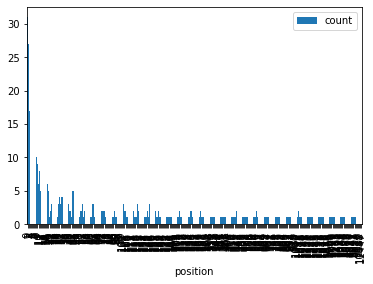

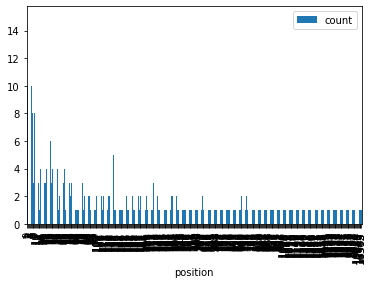

In [9]:
result_dict = {}
result_dict = copy.deepcopy(mero)

for temp_num in range(2):
    count_dict = {}
  
        
    for (key,value) in mero.items():
    
        # 没有预测结果的标记
        no_predict = 0

          # 处理模板
        print("==========================================================")
        text = templates[temp_num].replace('*',key)
        print(text)
    
    
        # module
        if mask_token is not None:
            text = text.replace(' _ ', ' %s ' % mask_token)
        tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
        tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
        marker = '*'
        if marker in tokens:
            assert tokens.count(marker) == 2, str(tokens)
            p, h = [i for i, token in enumerate(tokens) if token == marker]
            tokens = [token for token in tokens if token != marker]
            h -= 1
            print(tokens[p], tokens[h])
        token_ids = tokenizer.convert_tokens_to_ids(tokens)
        pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
        tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
                  for token in tokens] 
        #print(tokens)

        input_ids = torch.tensor([token_ids])
        with torch.no_grad():
            logits, attns = model(input_ids, output_attentions=True)
            probs = F.softmax(logits, dim=-1)

        for i in pred_idx:
            top_probs, top_indexes = probs[0][i].topk(10)
            top_tokens = tokenizer.convert_ids_to_tokens(top_indexes) 


            # remove G
            ans = []
            for word in top_tokens:
                ans.append(word[1:])
            print(ans)
            print(top_probs)


            # 找到每个同义词位于预测的第几个位置，先找到概率最大的，再去找最大的是预测的第几个
            # 找到每个同义词对应的概率
            word_probe = {}
            for word in value:
                word_id = tokenizer._convert_token_to_id('Ġ'+ word)
                if (word_id != 3):
                    word_probe[word] = probs[0][i][word_id]
                else:
                    print(word + 'is not in list')

            print(word_probe)

            # 找到同义词中概率最大的词和值

            # 没有反义词在预测的结果里
            # 保存计算结果的json文件中写为 -1
            if (len(word_probe)==0):
                no_predict = 1
                break


            max_word = max(word_probe, key=word_probe.get)
            max_probe = word_probe[max_word]

            print('max_probe is: ',end='')
            print(max_probe)

            # 判断概率最大的同义词是预测的第几个
            # 不要陷入死循环
            # k的值不要超过 tensor 的长度
            k = 10
            probe_get = 0
            while(probe_get == 0):
                top_probs, top_indexes = probs[0][i].topk(k)
                #print(top_probs)
                if max_probe in top_probs:
                    print('the position of max probe is: ',end='')
                    print((top_probs == max_probe).nonzero()[0].item())
                    print('-----------------------------------------------------')

                    probe_get = 1
                else:
                    k=k*2
                    print(k)
                    if (k >= list(probs[0][i].size())[0]):
                        top_probs, top_indexes = probs[0][i].topk(probs[0][i].size())
                        print(top_probs)
                        print('the position of max probe is: ',end='')
                        print((top_probs == max_probe).nonzero()[0].item())
                        print('-----------------------------------------------------')
                        probe_get = 1


            print('*****************************************************')

            
        # 没有预测结果
        if(no_predict == 1):
            # 写入结果文件
            if (temp_num == 0):
                result_dict[key] = [result_dict[key],-1]
            else:
                result_dict[key].append(-1)
            continue

            
        # 有预测结果
        position = (top_probs == max_probe).nonzero()[0].item()
        # 写入结果文件
        if (temp_num == 0):
            result_dict[key] = [result_dict[key],position]
        else:
            result_dict[key].append(position)


        if position not in count_dict:
            count_dict[position] = 1
        else:
            count_dict[position]+=1

       
    
    
    # 画图
    count_dict_keys = count_dict.keys()
    count_dict_values = count_dict.values()

    data = {
        'count':Series(count_dict_values),
        'position':Series(count_dict_keys)
    }

    df = DataFrame(data)
    df.sort_values("position",inplace=True)
    print(df)
    # plt.bar(count_dict_keys,count_dict_values)
    df.plot(x='position',y='count',kind='bar')
    
    
    
# 保存到json文件
with open("result_mero.json", "w") as outfile:  
    json.dump(result_dict, outfile)